## Questions
Overarching: 
-How similar or different are field 2017 samples from lab 2018 samples?
-What ASVs are shared across all oysters?
-What ASVs are shared across all oysters and not found in mussels or clams?

Field(2017): 
-Is there any site effect?
-Are there ASVs associated with perkinsus infection? Associated with increasing perkinsus infection?
-Are there ASVs associated with presence of a pea crab?
-Are there ASVs associated with growth patterns?

Lab (2018): 
-How similar or different are the microbiomes of the four species? 
-What ASVs are uniquely shared between oysters in the polyculture treatments and mussels? 
-Are there ASVs associated with growth patterns?

Some ideas on how to look for differences:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0237779

https://link.springer.com/article/10.1186/s12859-020-03803-z
https://academic.oup.com/bioinformatics/article/36/17/4544/5843784

Taking into account phylogeny:
https://www.frontiersin.org/articles/10.3389/fmicb.2018.01391/full



In [ ]:
#make everything underscores
asv_all=apply(asv_all, 2, function(x) gsub("-","_",x))
meta=apply(meta, 2, function(x) gsub("-","_",x))

In [ ]:
write.csv(asv_all, file="~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")

In [ ]:
write.csv(meta, file="~/Documents/DE_16S/DE16S_allmeta.csv")

In [1]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
require(RColorBrewer)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: ggplot2

Loading required package: RColorBrewer



In [2]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [3]:
#fix rownames
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [4]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
remove=negcounts[,colSums(negcounts)>0]
#asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [5]:
remove

,TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTGAAGTTAAAGCTCGGTGCTCAACACCGACCCGCTTTGGATACTGATAGACTAGAGTTATATAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGATATACACTGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG,TACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGAGTCTAGGCGGTTTGTTAAGTCAGATGTGAAAATGCGGGGCTCAACTCCGTATGGCCTTTGATACTGGCAAACTAGAGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATAGTGAAGACAGCTCACTGGACAGATACTGACGCTAAAGCTCGAAAGCGTGGGGAGCAAACAGG,TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGTGGTCAAGAAAGTCTGAAGTTAAAGCTCGGGGCTCAACCCCGACCCGCTTTGGAAACTACTTGACTAGAGTCATGAAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGGAATGAACTGACACTGAGGGACGAAAGCGTGGGGAGCAAACAGG,TACGGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGAGCGTAGGCGGCTGTGTAAGTTGGATGTGAAATCCCGGGGCTTAACCCCGGAACTGCATCCAAAACTGCAGAGCTAGAGTACAGTAGAGGGAGGTAGAATTTCCGGTGTAGCGGTGAAATGCGTAGAGATCGGAAGGAATACCAGTGGCGAAGGCGGCCTCCTGGACTGATACTGACGCTGAGGTTCGAAAGCGTGGGGAGCAAACAGG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGGGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGAGATTGGAAAGAACACCGATGGCGAAGGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTAATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTAAAGTTAAAGCCTGGGGCTCAACCCCAGCCCGCTTTGGATACTGGTAGACTAGAGTTATAGAGAGGTTAGTGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAACTAACTGGCTATACACAGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG,TACGGGGGGTGCTAGCGTTAATCGGAATTACTGGGCGTAAAGAGTTTGTAGGCGGTTTGATAAGTCAGATGTGAAAGACCTAAGCTCAACTTAGGAAGTGCATATGATACTGTCTAACTAGAGTTTAACAGAGGATTAAGGAATTTTCGGTGTAGCGGTGAAATGCGTAGATATCGAAAGGAACATCAATGGCGAAGGCAATAATCTGGGATTAGACTGACGCTGAGAAACGAAAGCTTGGGTAGCAAACAGG,TACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTTGTCGCGTCGTCTGTGAAATCCCGGGGCTTAACTTCGGGCGTGCAGGCGATACGGGCATAACTTGAGTGCTGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCAGTAACTGACGCTGAGGAGCGAAAGCATGGGTAGCGAACAGG,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACGAGAGGGGCAAGCGTT

In [6]:
#pull out the dilution effect samples
meta_de=meta[meta$Experiment=="Field17"|meta$Experiment=="Lab18",]

In [7]:
asv_de=asv_all[rownames(asv_all) %in% meta_de$UniqueID,]

In [8]:
NCOL(asv_all)

[1] 16383

In [9]:
asv_de=asv_de[,colSums(asv_de)>0]

In [10]:
NCOL(asv_de)

[1] 14760

In [11]:
#make taxa list that just applies to de samples
taxa_de=taxa[rownames(taxa)%in% colnames(asv_de),]

In [12]:
NROW(taxa_de)

[1] 14760

In [13]:
taxa_de=as.matrix(taxa_de)

In [14]:
taxa_de=as.matrix(taxa_de)
meta_de=as.data.frame(meta_de)
row.names(meta_de)=meta_de$UniqueID

In [15]:
OTU = otu_table(t(asv_de), taxa_are_rows = TRUE)
TAX = tax_table(taxa_de)
SAMP=sample_data(meta_de)

In [16]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

# how similar are microbiomes across studies (field/lab, VA/MD, 2017/2018)

In [17]:
DE = phyloseq(OTU, TAX, SAMP)

In [18]:
DE.ord <- ordinate(DE, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1595674 
Run 1 stress 0.2065592 
Run 2 stress 0.1687683 
Run 3 stress 0.2017936 
Run 4 stress 0.1733322 
Run 5 stress 0.1681632 
Run 6 stress 0.167893 
Run 7 stress 0.1682282 
Run 8 stress 0.1880425 
Run 9 stress 0.1912747 
Run 10 stress 0.1884967 
Run 11 stress 0.1615989 
Run 12 stress 0.1966974 
Run 13 stress 0.1714729 
Run 14 stress 0.1680774 
Run 15 stress 0.1901774 
Run 16 stress 0.1975541 
Run 17 stress 0.182756 
Run 18 stress 0.1888044 
Run 19 stress 0.184888 
Run 20 stress 0.1861198 
Run 21 stress 0.1750049 
Run 22 stress 0.178814 
Run 23 stress 0.2050619 
Run 24 stress 0.2054538 
Run 25 stress 0.1814979 
Run 26 stress 0.1768411 
Run 27 stress 0.184045 
Run 28 stress 0.1852298 
Run 29 stress 0.1787224 
Run 30 stress 0.1595674 
... Procrustes: rmse 4.463277e-05  max resid 0.0006007099 
... Similar to previous best
*** Solution reached


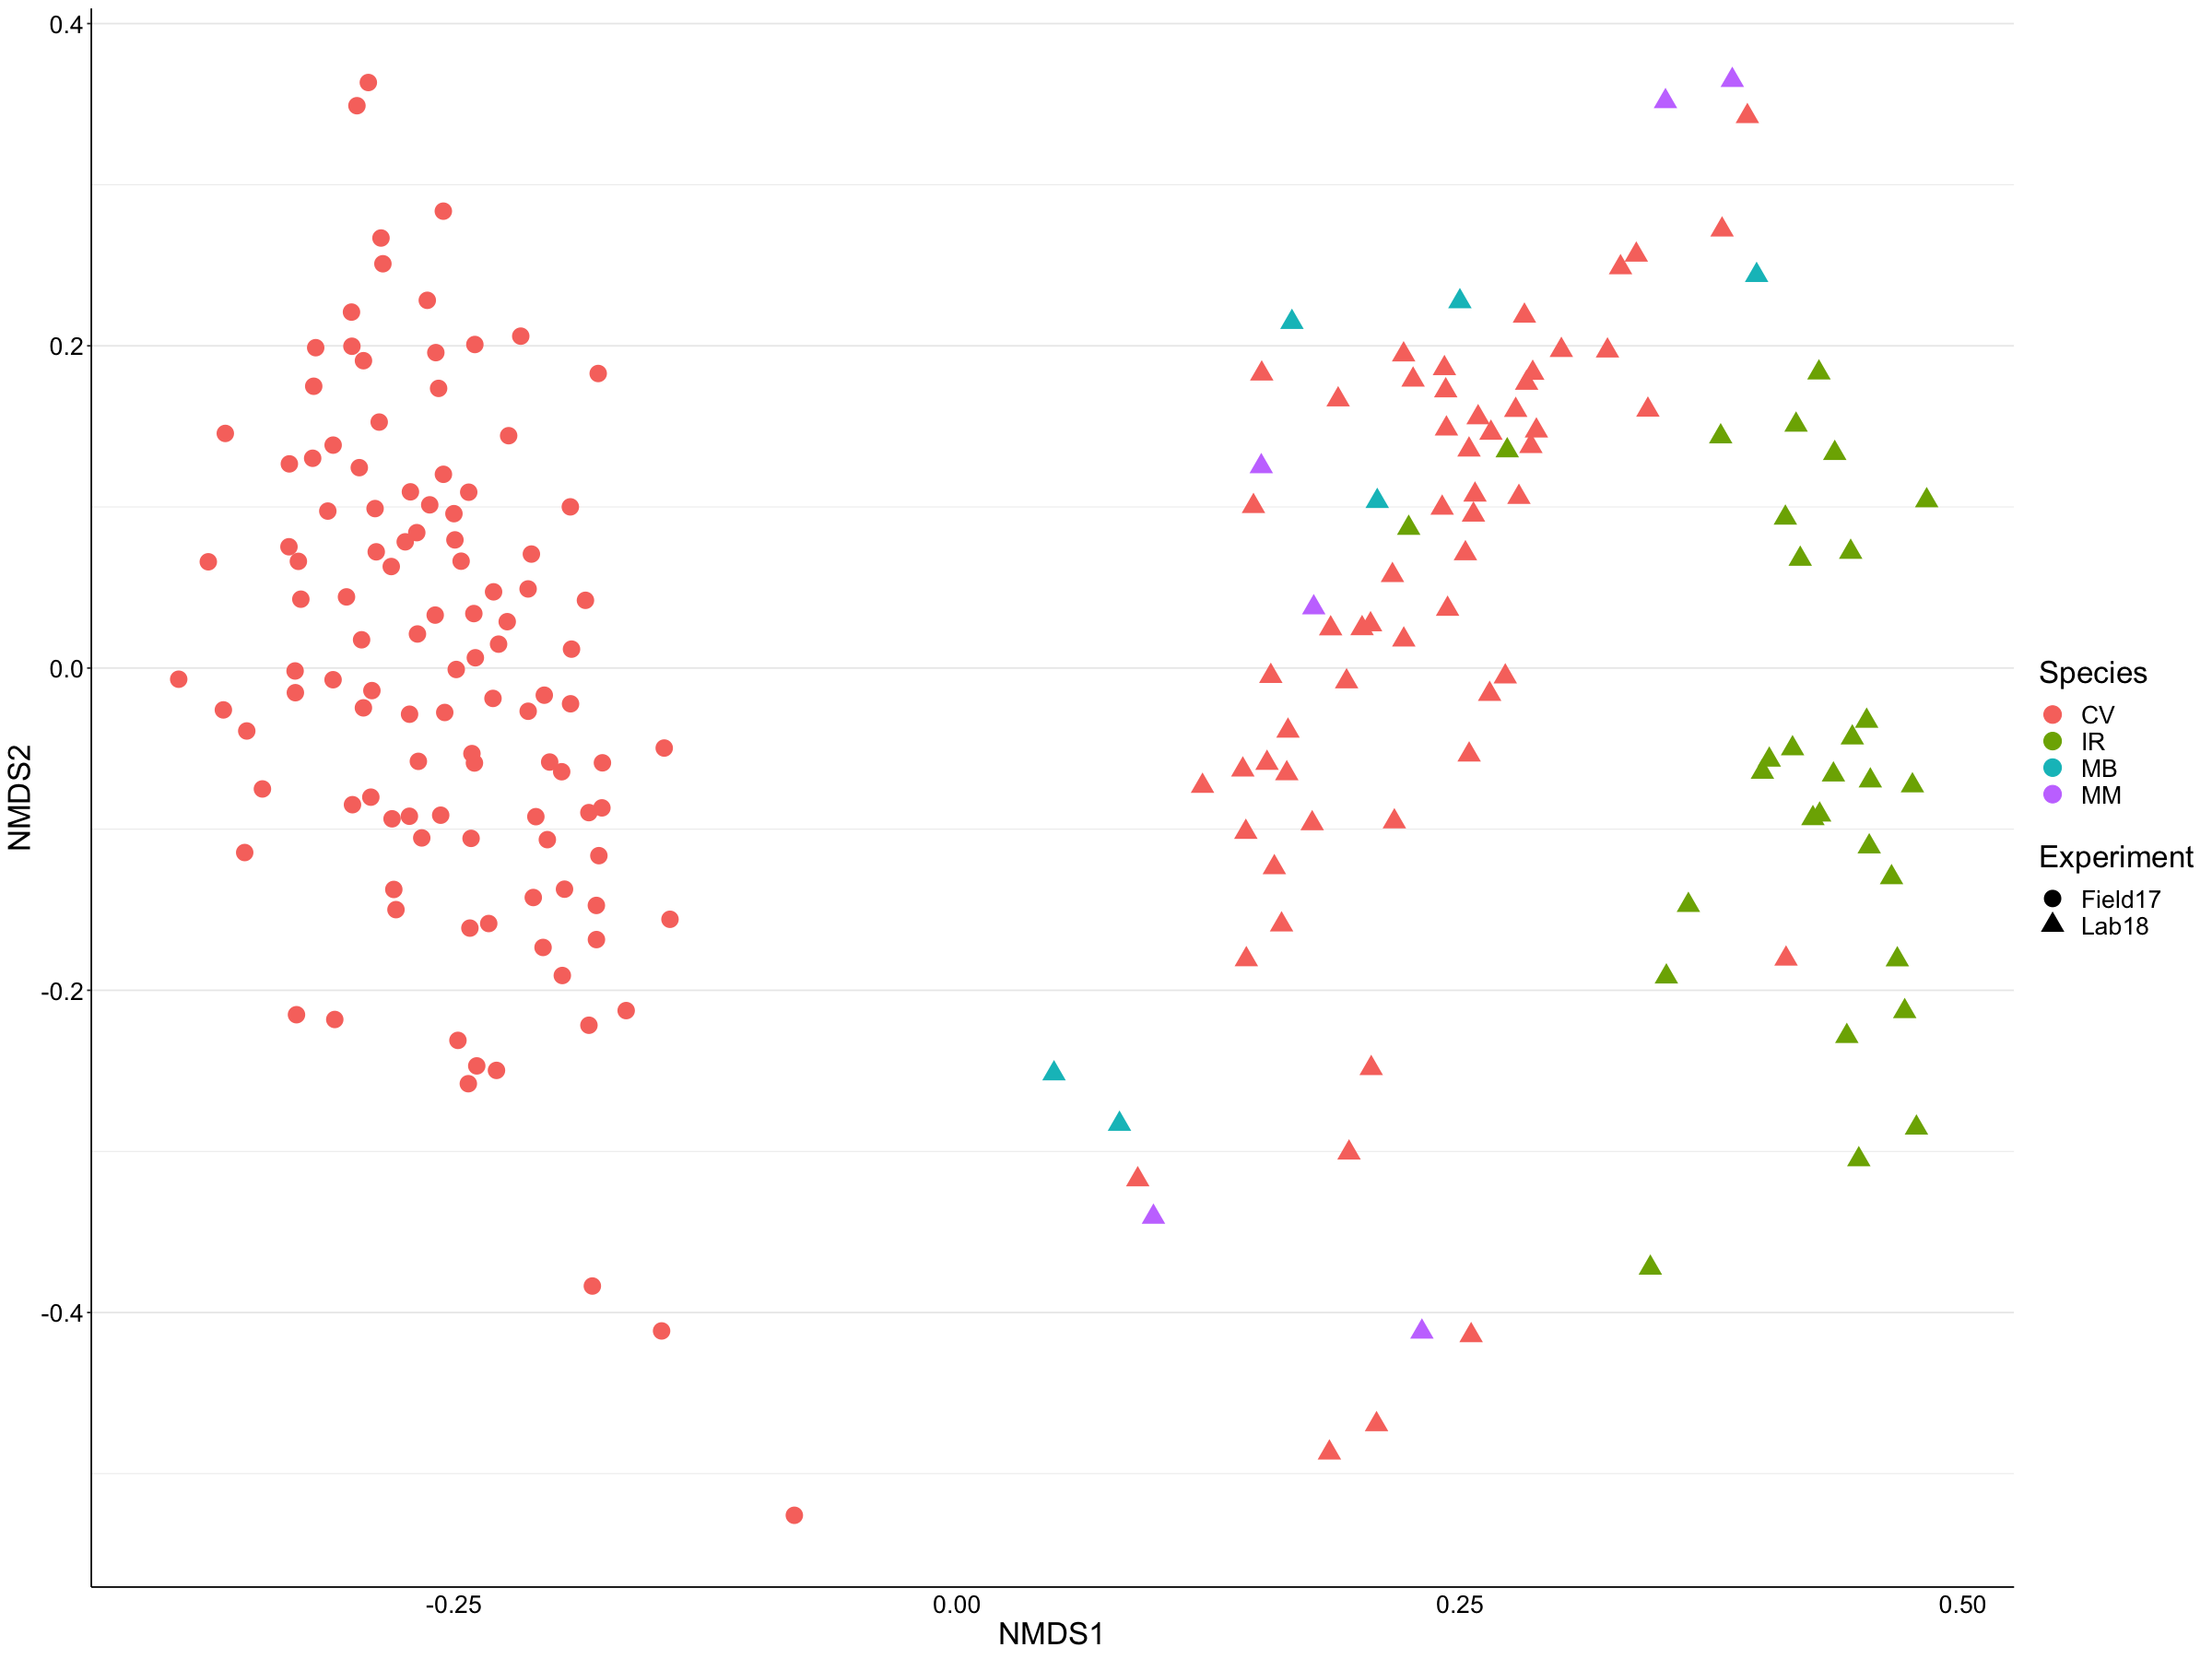

In [19]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Experiment")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [20]:
#top 100 taxa
DE_100 = prune_taxa(names(sort(taxa_sums(DE),TRUE)[1:100]), DE)

In [30]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(21)


In [31]:
mycolors

[1] "#1B9E77" "#5D874E" "#A07125" "#D35F0A" "#B16548" "#8D6B86" "#8068AE"
 [8] "#A850A0" "#D03792" "#D33B79" "#A66753" "#79932E" "#7FA718" "#ACA80E"
[15] "#D9AA04" "#D59D08" "#BF8B12" "#A9781B" "#927132" "#7C6B4C" "#666666"

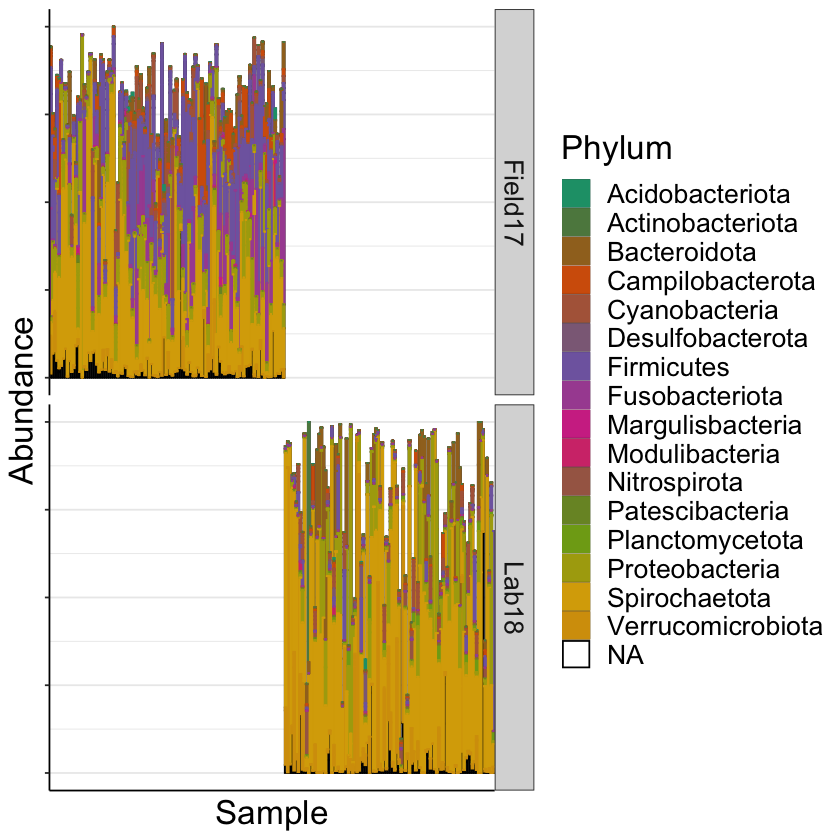

In [32]:
plot_bar(DE_100,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
facet_grid(Experiment~., scales = "free_x")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=20))

# 2018 Lab experiment

In [21]:
DE17=subset_samples(DE, Year=="2017")
DE18=subset_samples(DE, Year=="2018")

In [22]:
DE18CV=subset_samples(DE18, Species=="CV")
DE18M=subset_samples(DE18, Species=="MB"| Species=="MM")

In [23]:
DE18.ord <- ordinate(DE18, "NMDS", "bray", trymax=100)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1906192 
Run 1 stress 0.2264724 
Run 2 stress 0.2003918 
Run 3 stress 0.2069995 
Run 4 stress 0.237864 
Run 5 stress 0.1905765 
... New best solution
... Procrustes: rmse 0.003272142  max resid 0.02274905 
Run 6 stress 0.1906205 
... Procrustes: rmse 0.003202378  max resid 0.02271308 
Run 7 stress 0.1905765 
... Procrustes: rmse 1.270572e-05  max resid 0.0001076441 
... Similar to previous best
Run 8 stress 0.2245854 
Run 9 stress 0.1906193 
... Procrustes: rmse 0.003786862  max resid 0.02719704 
Run 10 stress 0.198451 
Run 11 stress 0.2276243 
Run 12 stress 0.243048 
Run 13 stress 0.2448797 
Run 14 stress 0.2137265 
Run 15 stress 0.2238731 
Run 16 stress 0.2136446 
Run 17 stress 0.2019576 
Run 18 stress 0.1984572 
Run 19 stress 0.1906204 
... Procrustes: rmse 0.003202798  max resid 0.02271724 
Run 20 stress 0.198593 
*** Solution reached


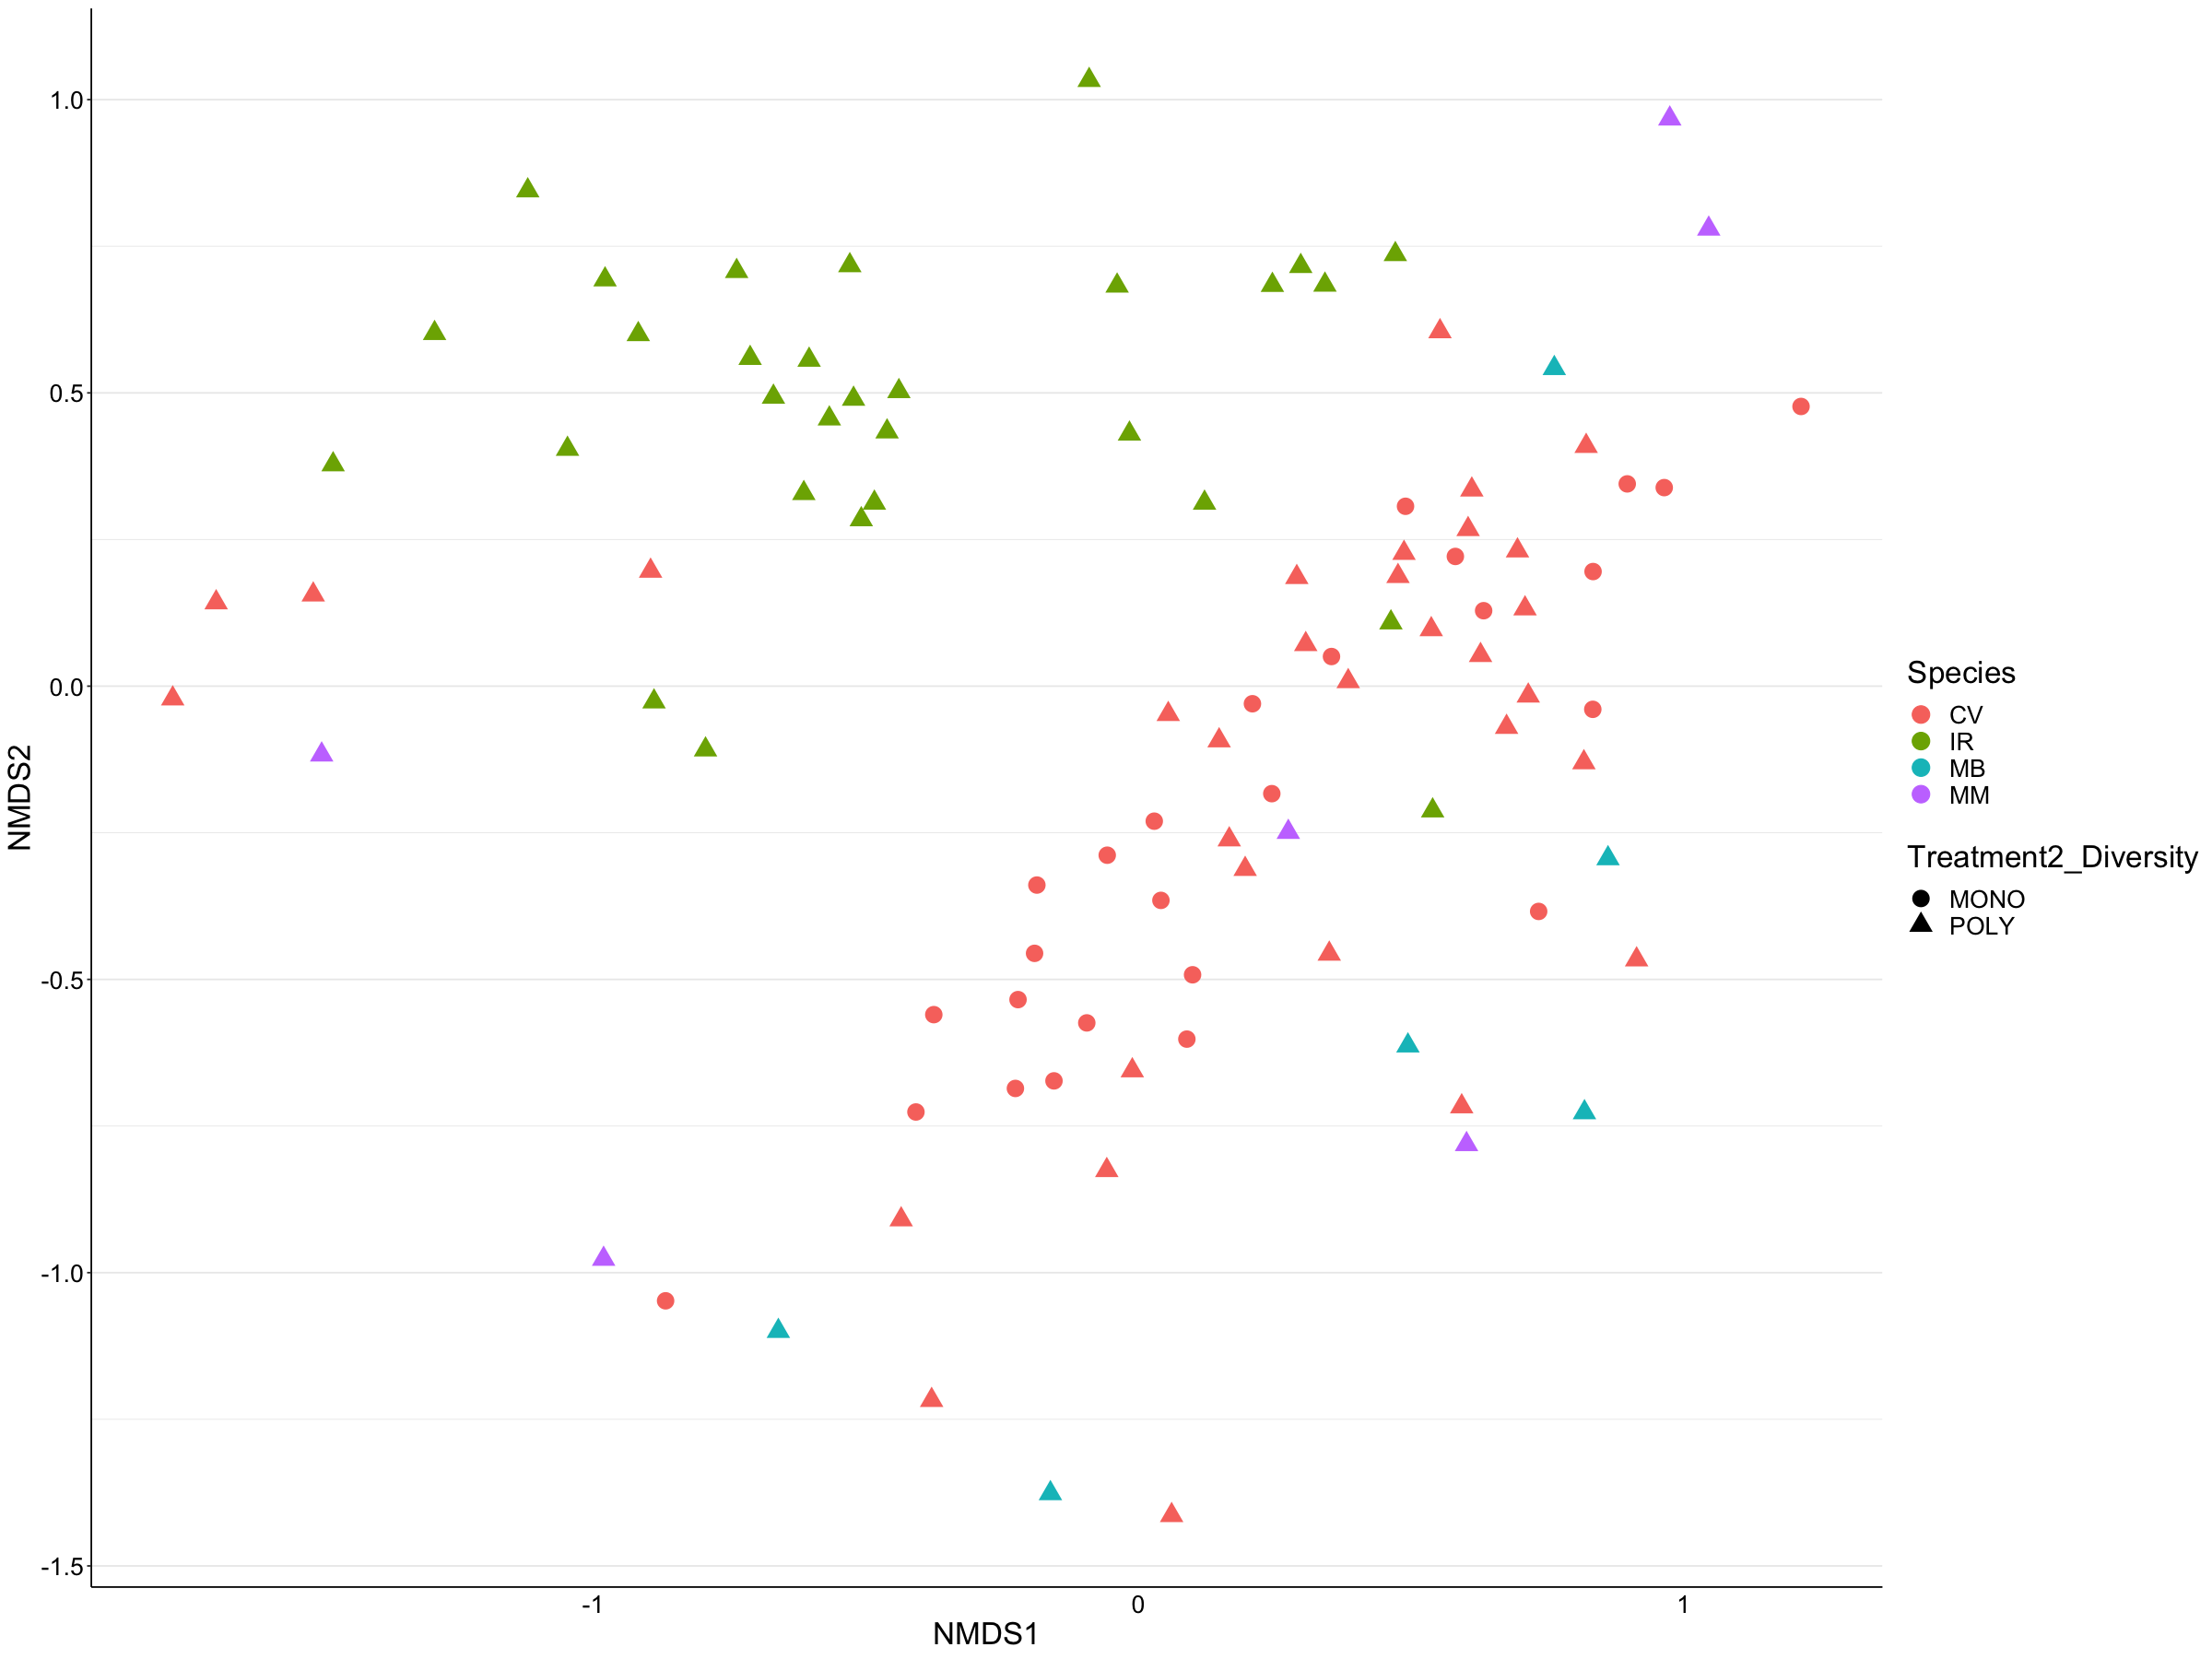

In [24]:
plot_ordination(DE18, DE18.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [25]:
DE18CV.ord <- ordinate(DE18CV, "NMDS", "bray", trymax=100)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1706463 
Run 1 stress 0.1660262 
... New best solution
... Procrustes: rmse 0.07484902  max resid 0.2997526 
Run 2 stress 0.1653893 
... New best solution
... Procrustes: rmse 0.06755078  max resid 0.3648963 
Run 3 stress 0.1602805 
... New best solution
... Procrustes: rmse 0.03607348  max resid 0.2616127 
Run 4 stress 0.1736845 
Run 5 stress 0.1741516 
Run 6 stress 0.1751255 
Run 7 stress 0.1721566 
Run 8 stress 0.1566161 
... New best solution
... Procrustes: rmse 0.05059934  max resid 0.3415928 
Run 9 stress 0.179735 
Run 10 stress 0.1629215 
Run 11 stress 0.1703931 
Run 12 stress 0.1690405 
Run 13 stress 0.1738711 
Run 14 stress 0.1751188 
Run 15 stress 0.1585715 
Run 16 stress 0.1623318 
Run 17 stress 0.1745954 
Run 18 stress 0.1693399 
Run 19 stress 0.1753604 
Run 20 stress 0.1762737 
Run 21 stress 0.1687283 
Run 22 stress 0.1694553 
Run 23 stress 0.1810692 
Run 24 stress 0.1663172 
Run 25 stress 0.173654

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


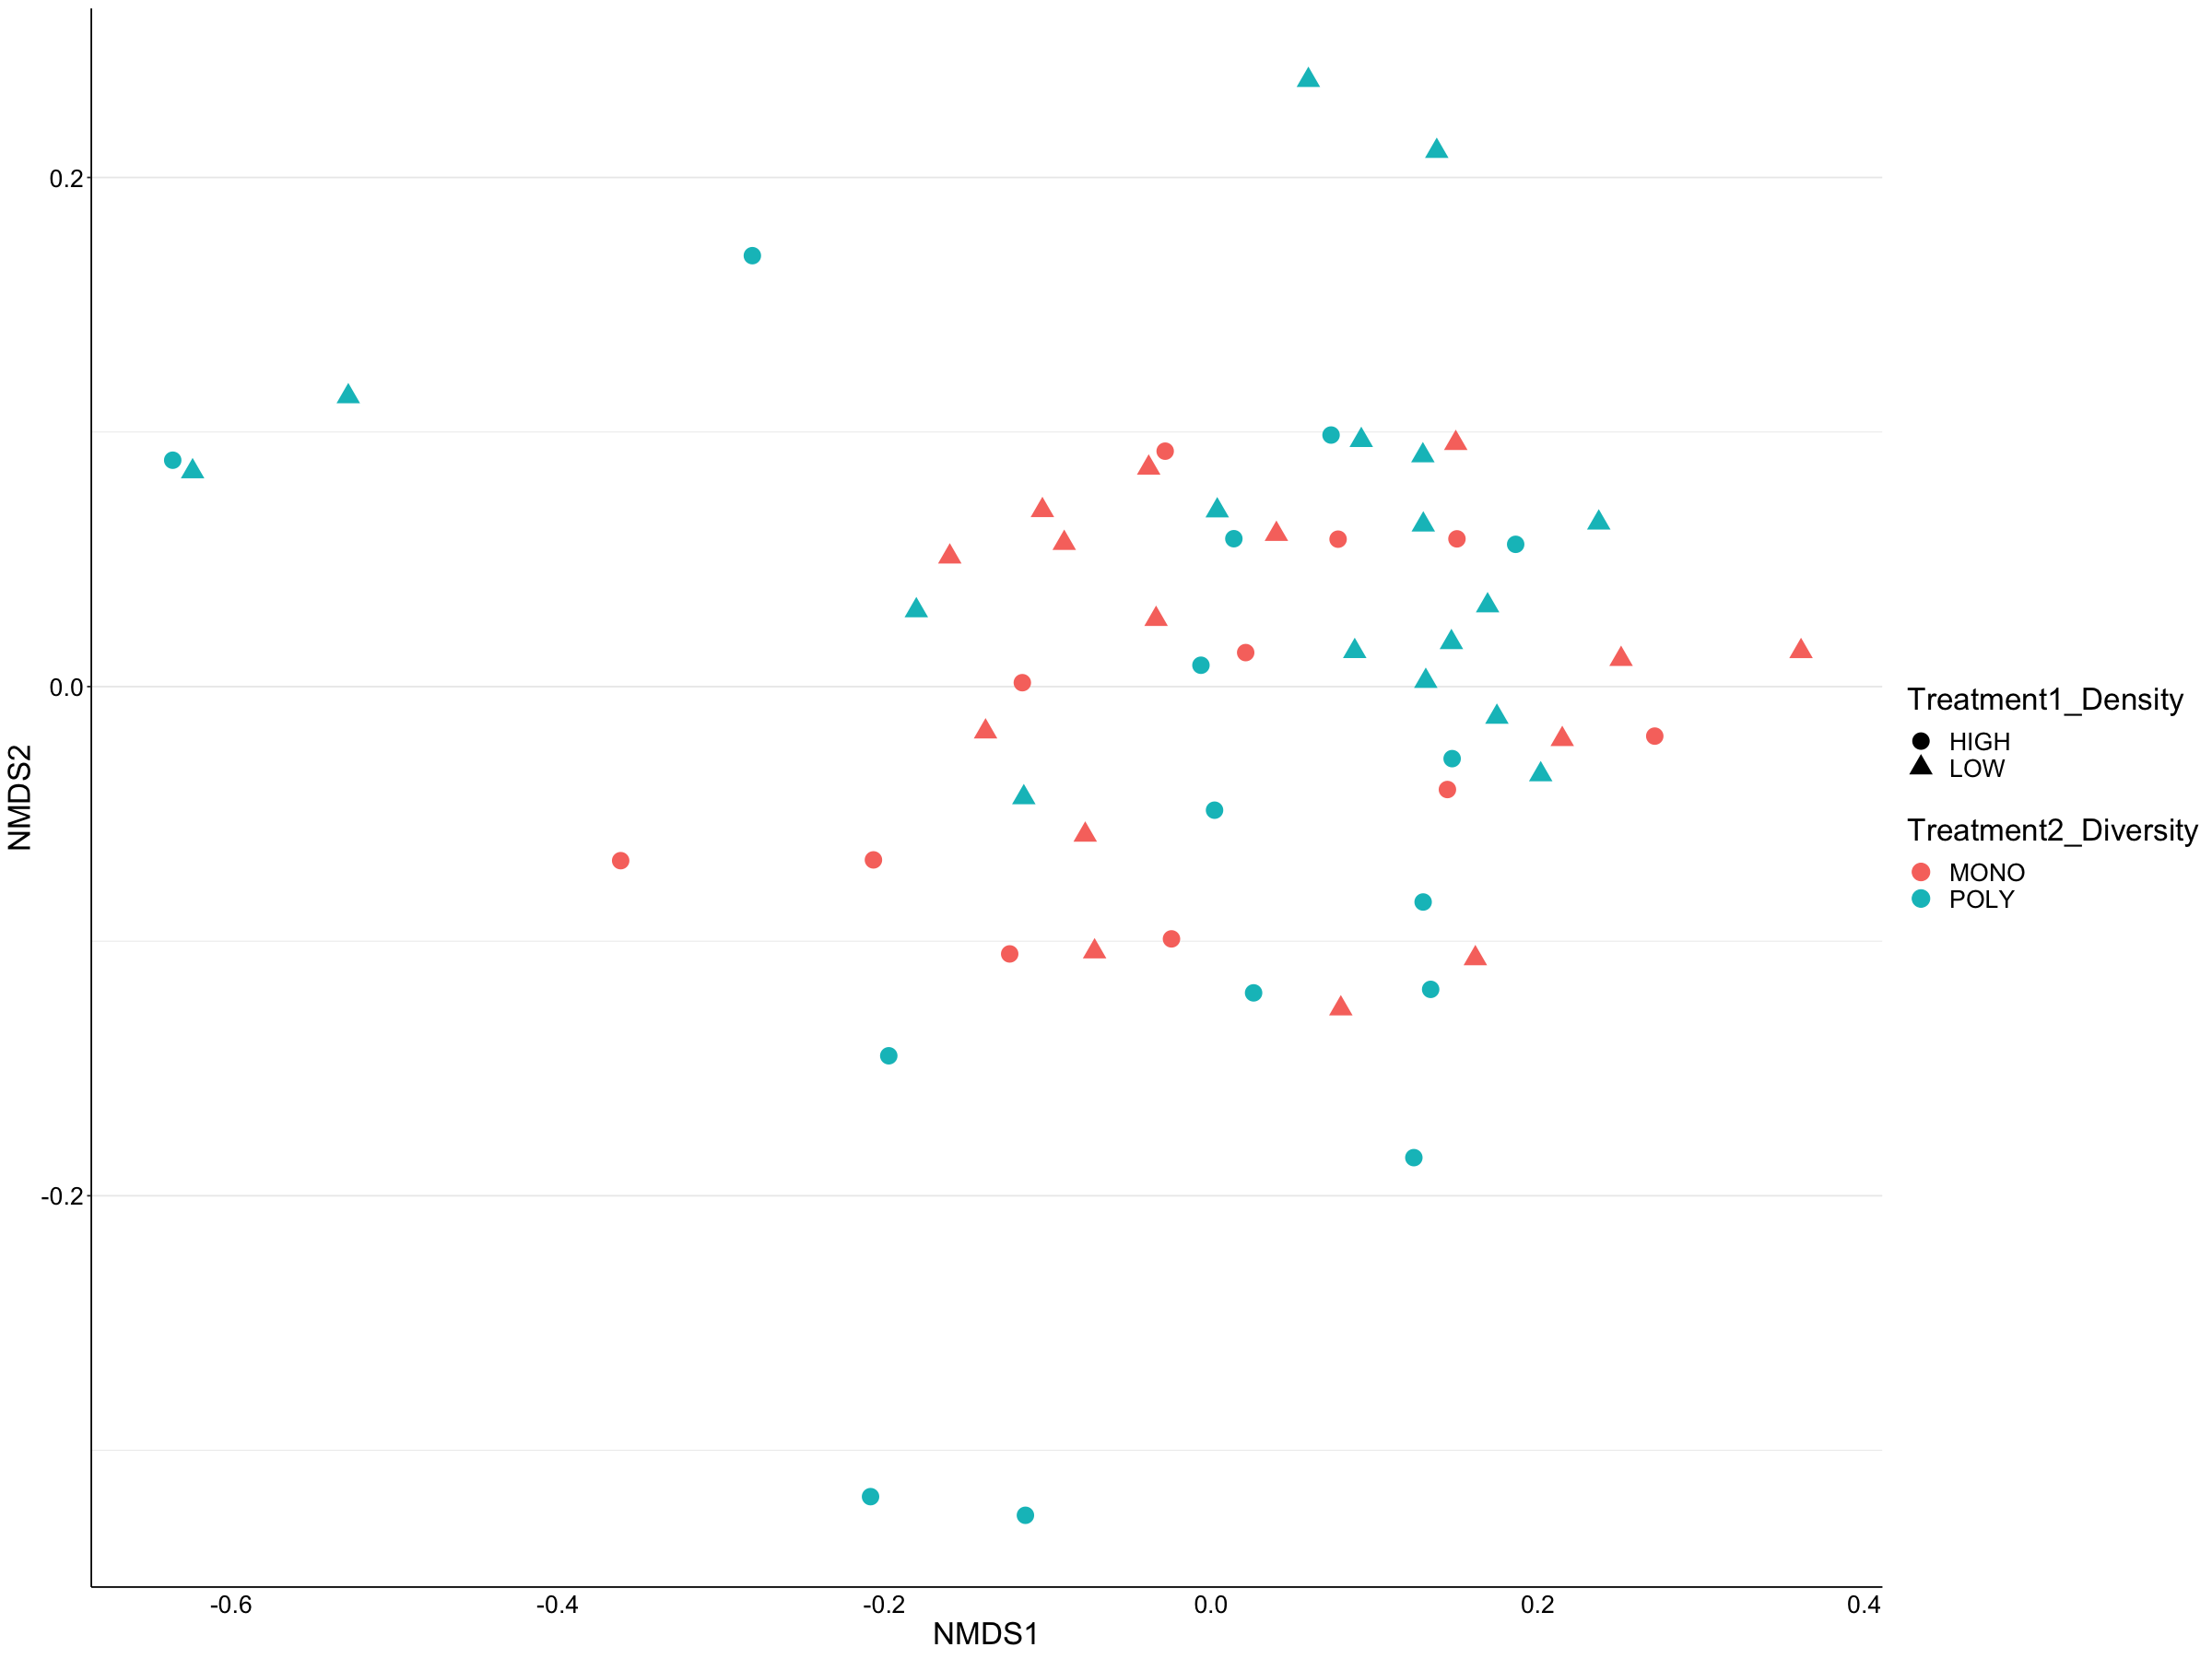

In [26]:
plot_ordination(DE18CV, DE18CV.ord, type="samples", color="Treatment2_Diversity", shape="Treatment1_Density")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [42]:
#top 100 taxa
DE18_100 = prune_taxa(names(sort(taxa_sums(DE18),TRUE)[1:100]), DE18)

In [43]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(39)

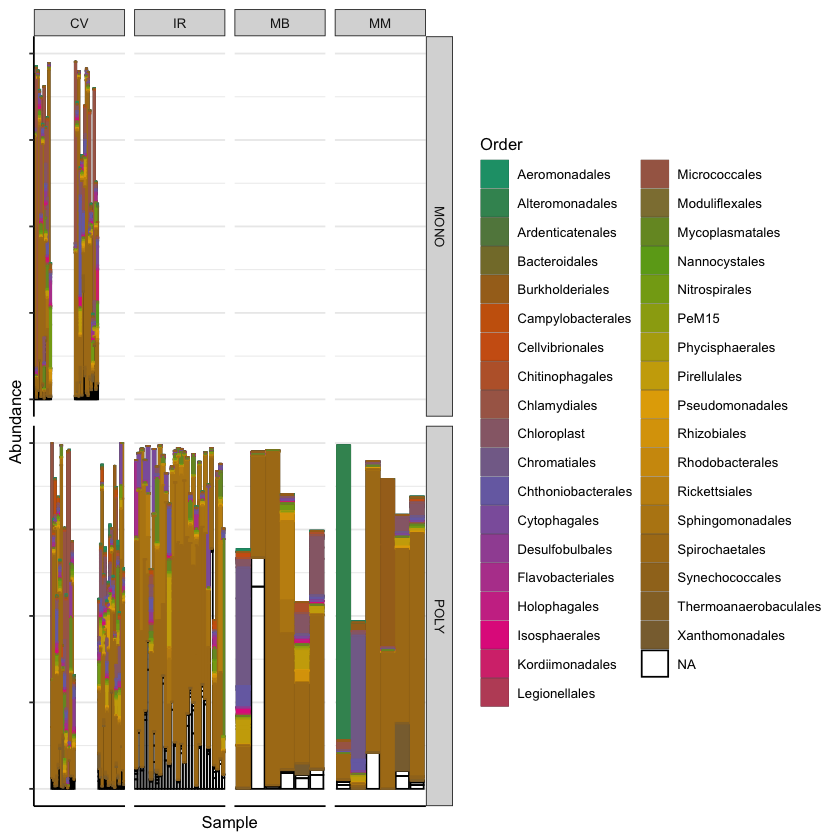

In [45]:
plot_bar(DE18_100,  fill="Order") +
facet_grid(Treatment2_Diversity~Species, scales = "free_x")+
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
scale_fill_manual(values=mycolors, drop=TRUE)+
scale_color_manual(values=mycolors, drop=TRUE)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=10))

In [46]:
#top 100 taxa
DE_100 = prune_taxa(names(sort(taxa_sums(DE),TRUE)[1:100]), DE)

In [216]:
DE17pos

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14743 taxa and 78 samples ]
sample_data() Sample Data:       [ 78 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 14743 taxa by 6 taxonomic ranks ]

In [218]:
DE17pos.ord <- ordinate(DE17pos, "NMDS", "jaccard", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2529488 
Run 1 stress 0.2504103 
... New best solution
... Procrustes: rmse 0.04867207  max resid 0.1988074 
Run 2 stress 0.2530209 
Run 3 stress 0.2545586 
Run 4 stress 0.2505265 
... Procrustes: rmse 0.03909983  max resid 0.1753747 
Run 5 stress 0.2458588 
... New best solution
... Procrustes: rmse 0.05162306  max resid 0.1915237 
Run 6 stress 0.2576897 
Run 7 stress 0.2529135 
Run 8 stress 0.2457339 
... New best solution
... Procrustes: rmse 0.03359652  max resid 0.1928773 
Run 9 stress 0.2465999 
Run 10 stress 0.2458613 
... Procrustes: rmse 0.03350054  max resid 0.1936795 
Run 11 stress 0.2535001 
Run 12 stress 0.2463018 
Run 13 stress 0.2500126 
Run 14 stress 0.2468355 
Run 15 stress 0.2527082 
Run 16 stress 0.2499257 
Run 17 stress 0.2519933 
Run 18 stress 0.2499633 
Run 19 stress 0.2485331 
Run 20 stress 0.2500516 
Run 21 stress 0.2517647 
Run 22 stress 0.2454952 
... New best solution
... Procrustes: r

Run 260 stress 0.2467095 
Run 261 stress 0.2460375 
Run 262 stress 0.251166 
Run 263 stress 0.247671 
Run 264 stress 0.2603482 
Run 265 stress 0.2479107 
Run 266 stress 0.2481468 
Run 267 stress 0.2477027 
Run 268 stress 0.2482609 
Run 269 stress 0.2485506 
Run 270 stress 0.2518375 
Run 271 stress 0.2458067 
... Procrustes: rmse 0.01463655  max resid 0.07236861 
Run 272 stress 0.2497683 
Run 273 stress 0.2518998 
Run 274 stress 0.2506982 
Run 275 stress 0.2481304 
Run 276 stress 0.2485614 
Run 277 stress 0.2521908 
Run 278 stress 0.2510635 
Run 279 stress 0.2544715 
Run 280 stress 0.2524039 
Run 281 stress 0.2509123 
Run 282 stress 0.2478315 
Run 283 stress 0.2499806 
Run 284 stress 0.2512169 
Run 285 stress 0.2466047 
Run 286 stress 0.2490853 
Run 287 stress 0.2458579 
... Procrustes: rmse 0.008113017  max resid 0.04329867 
Run 288 stress 0.2464756 
Run 289 stress 0.2530604 
Run 290 stress 0.2480437 
Run 291 stress 0.2462258 
Run 292 stress 0.2459506 
... Procrustes: rmse 0.03001538  

Run 529 stress 0.2493343 
Run 530 stress 0.2524767 
Run 531 stress 0.2527152 
Run 532 stress 0.24864 
Run 533 stress 0.2539339 
Run 534 stress 0.254386 
Run 535 stress 0.2484132 
Run 536 stress 0.247845 
Run 537 stress 0.2459454 
... Procrustes: rmse 0.034047  max resid 0.1956863 
Run 538 stress 0.2509439 
Run 539 stress 0.2468554 
Run 540 stress 0.2476747 
Run 541 stress 0.2532138 
Run 542 stress 0.2525978 
Run 543 stress 0.2477712 
Run 544 stress 0.2487309 
Run 545 stress 0.24704 
Run 546 stress 0.2463541 
Run 547 stress 0.2518406 
Run 548 stress 0.2486412 
Run 549 stress 0.2539878 
Run 550 stress 0.2501637 
Run 551 stress 0.2457393 
... Procrustes: rmse 0.01145004  max resid 0.07321413 
Run 552 stress 0.2497689 
Run 553 stress 0.2468984 
Run 554 stress 0.2483222 
Run 555 stress 0.2530842 
Run 556 stress 0.2528903 
Run 557 stress 0.2528956 
Run 558 stress 0.2497834 
Run 559 stress 0.2528046 
Run 560 stress 0.2549527 
Run 561 stress 0.2481234 
Run 562 stress 0.247721 
Run 563 stress 0

Run 810 stress 0.2486538 
Run 811 stress 0.2511135 
Run 812 stress 0.2462995 
Run 813 stress 0.2486917 
Run 814 stress 0.2516516 
Run 815 stress 0.2509242 
Run 816 stress 0.253016 
Run 817 stress 0.2471972 
Run 818 stress 0.2465305 
Run 819 stress 0.2460579 
Run 820 stress 0.2468231 
Run 821 stress 0.2457875 
... Procrustes: rmse 0.01218833  max resid 0.07077235 
Run 822 stress 0.2491207 
Run 823 stress 0.2520611 
Run 824 stress 0.2554677 
Run 825 stress 0.2498692 
Run 826 stress 0.2488736 
Run 827 stress 0.2511179 
Run 828 stress 0.2454954 
... Procrustes: rmse 0.004388531  max resid 0.03079523 
Run 829 stress 0.2499697 
Run 830 stress 0.2458082 
... Procrustes: rmse 0.01282565  max resid 0.07298834 
Run 831 stress 0.2468988 
Run 832 stress 0.246965 
Run 833 stress 0.2459165 
... Procrustes: rmse 0.03380652  max resid 0.1956851 
Run 834 stress 0.2521059 
Run 835 stress 0.2461869 
Run 836 stress 0.2476026 
Run 837 stress 0.2529463 
Run 838 stress 0.2485856 
Run 839 stress 0.2455033 
..

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


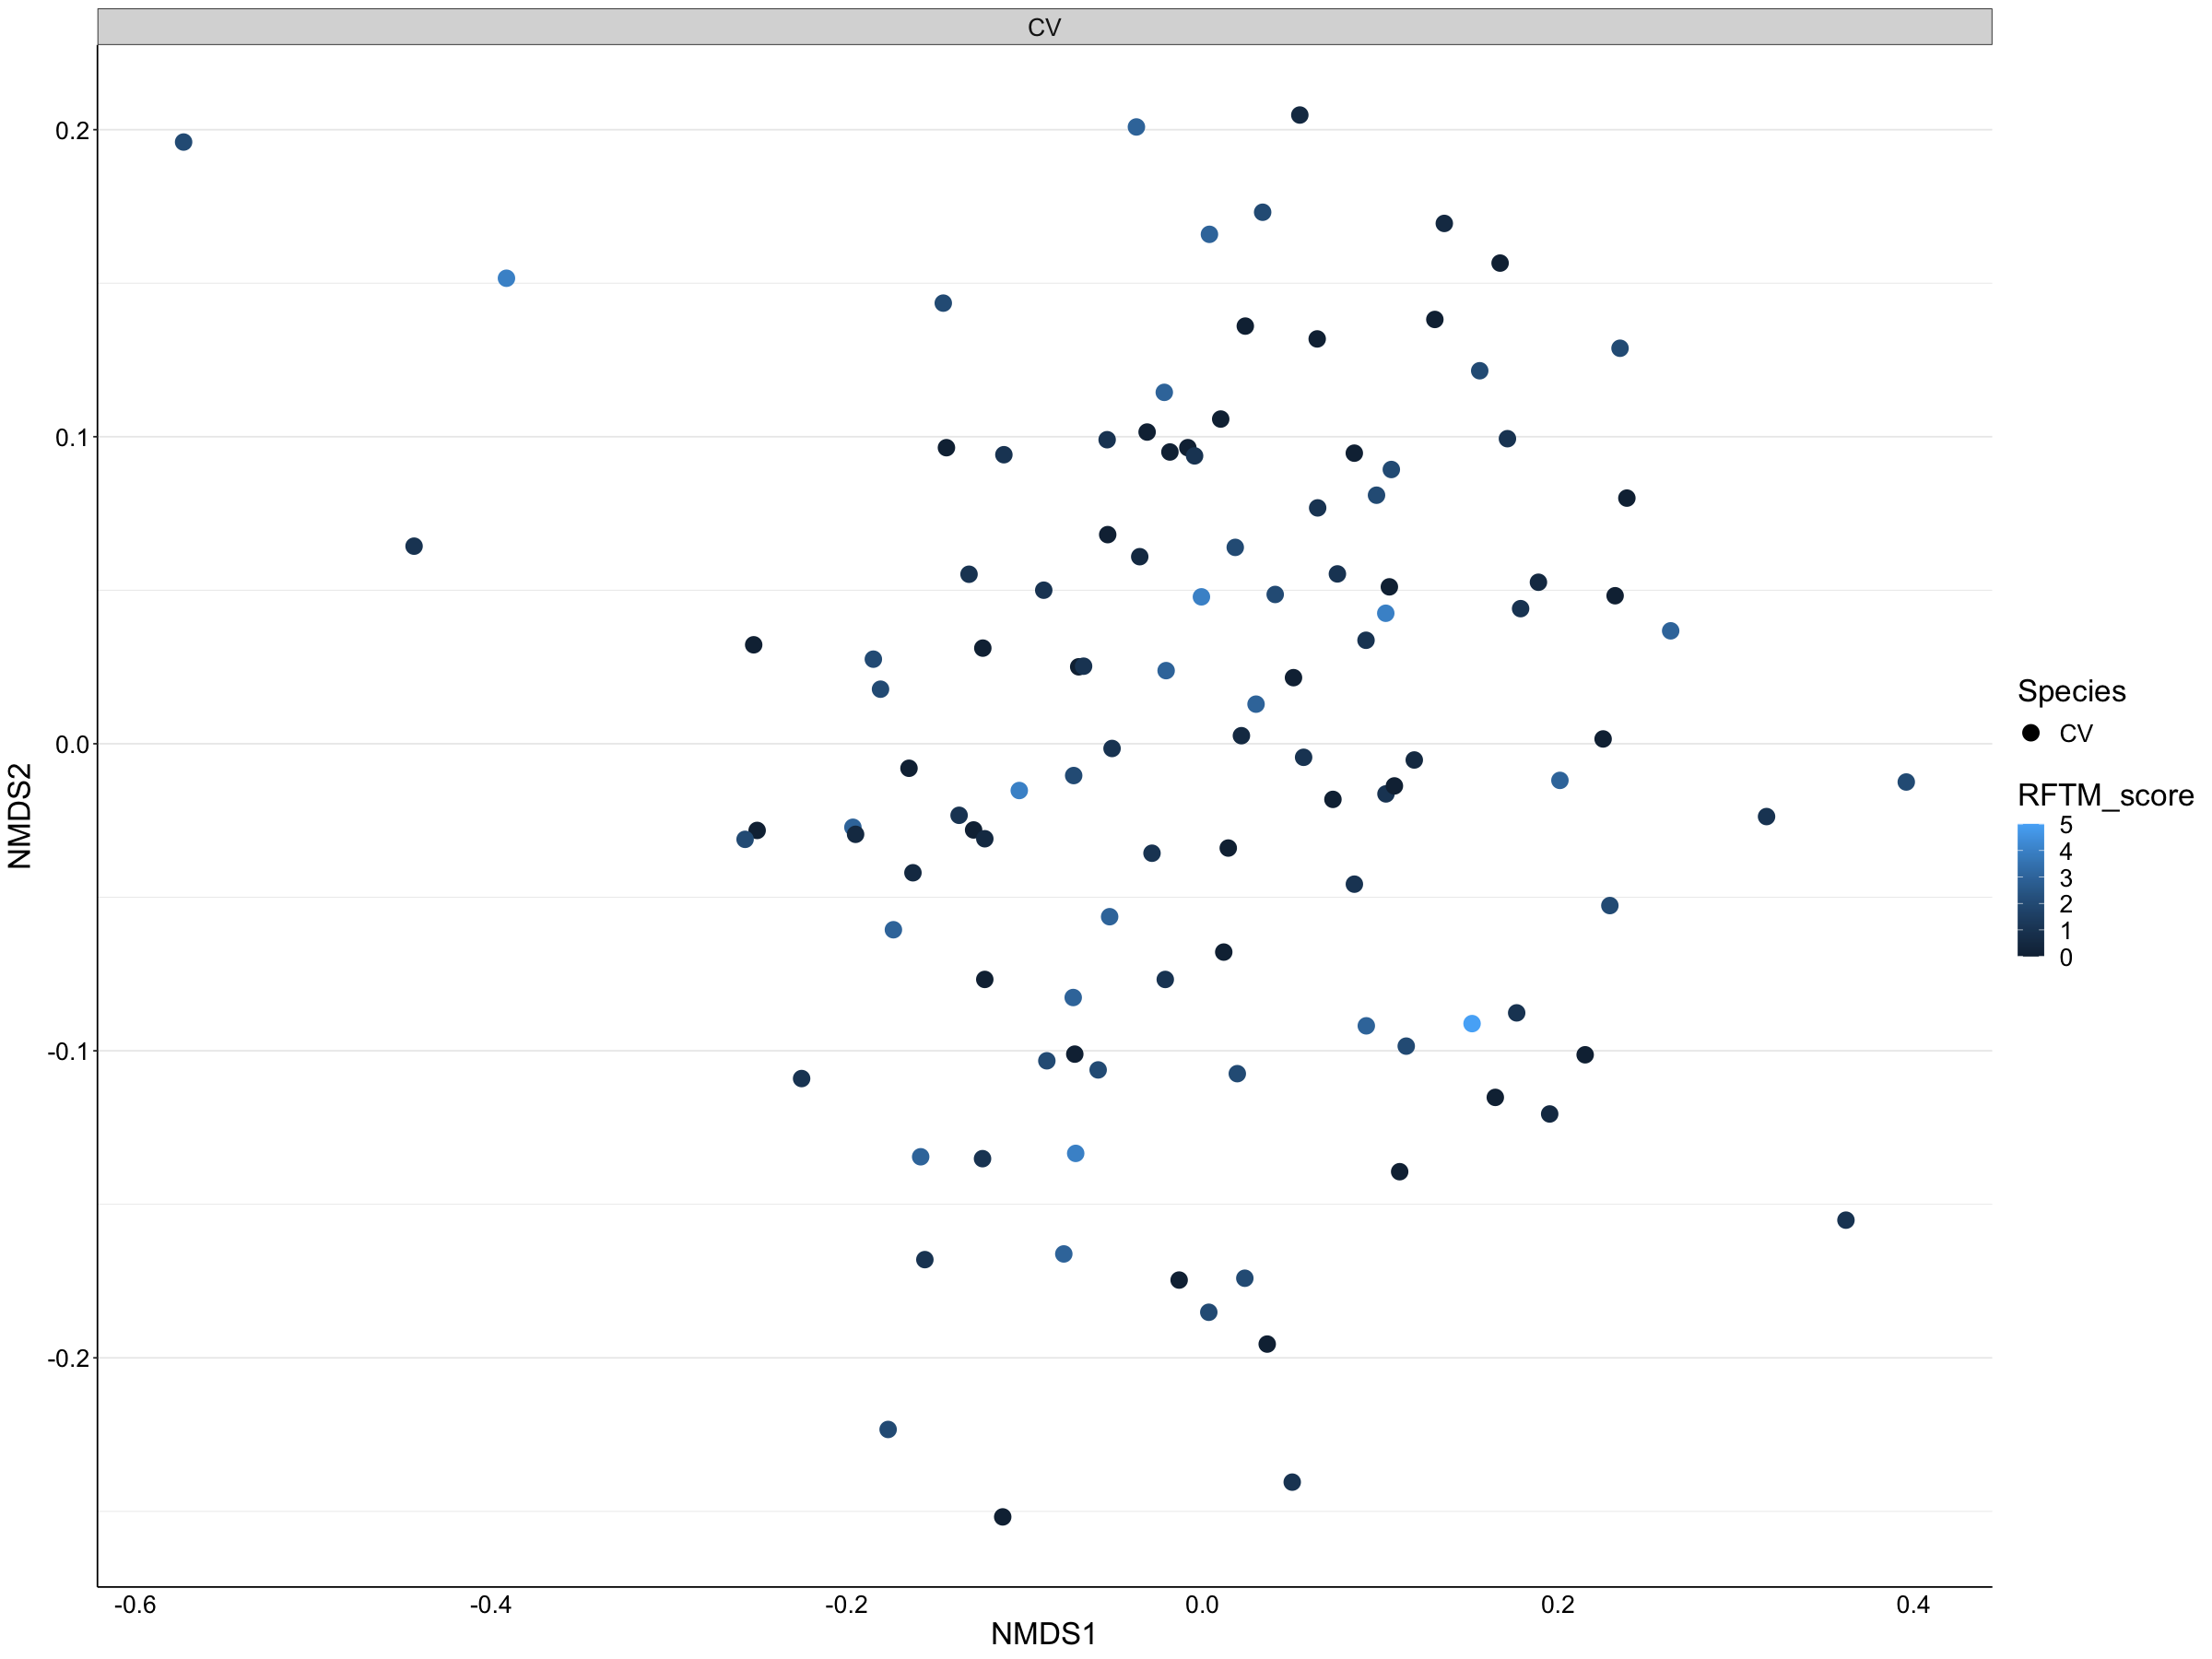

In [33]:
plot_ordination(DE17, DE17.ord, type="samples", color="RFTM_score", shape="Species")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

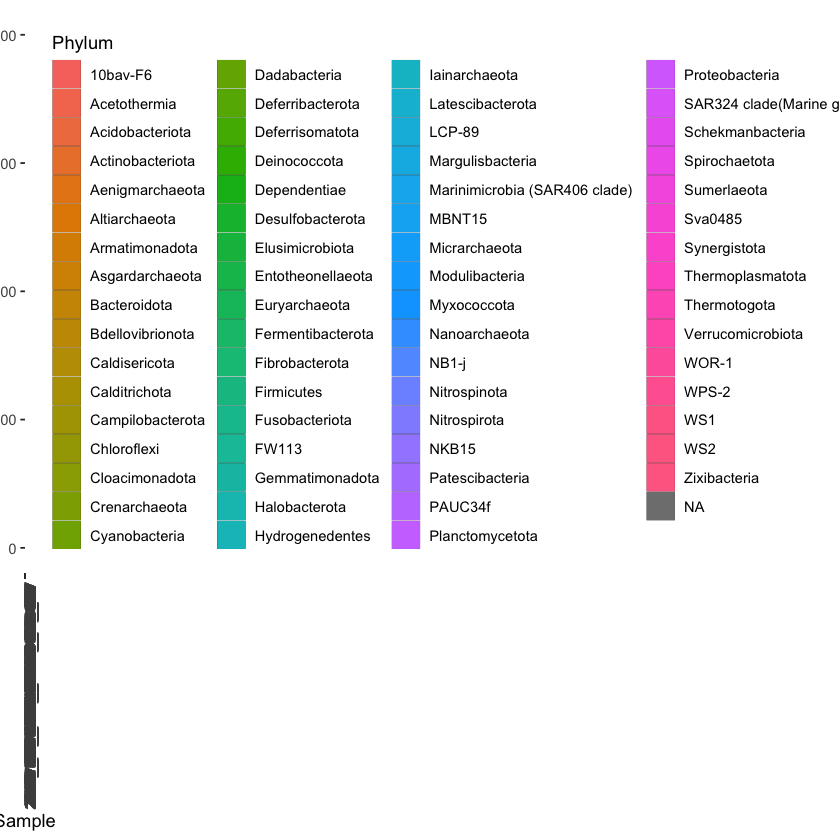

In [48]:
plot_bar(DE17,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


In [49]:
DE17fr = filter_taxa(DE17, function(x) mean(x) > 1e-4, TRUE)

In [50]:
DE17

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14760 taxa and 112 samples ]
sample_data() Sample Data:       [ 112 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 14760 taxa by 6 taxonomic ranks ]

In [29]:
DE17.ord <- ordinate(DE17, "NMDS", "bray", trymax=500, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1948345 
Run 1 stress 0.192946 
... New best solution
... Procrustes: rmse 0.03264774  max resid 0.1183562 
Run 2 stress 0.1928993 
... New best solution
... Procrustes: rmse 0.01466103  max resid 0.1163907 
Run 3 stress 0.1924374 
... New best solution
... Procrustes: rmse 0.02102737  max resid 0.1652987 
Run 4 stress 0.1927069 
... Procrustes: rmse 0.01937163  max resid 0.1224901 
Run 5 stress 0.1952571 
Run 6 stress 0.192876 
... Procrustes: rmse 0.02178836  max resid 0.1651457 
Run 7 stress 0.1953617 
Run 8 stress 0.1944204 
Run 9 stress 0.1934084 
Run 10 stress 0.1929899 
Run 11 stress 0.1944306 
Run 12 stress 0.1947779 
Run 13 stress 0.1945414 
Run 14 stress 0.1927832 
... Procrustes: rmse 0.01411714  max resid 0.09268446 
Run 15 stress 0.192892 
... Procrustes: rmse 0.02139736  max resid 0.1643968 
Run 16 stress 0.19371 
Run 17 stress 0.197538 
Run 18 stress 0.1952288 
Run 19 stress 0.1924415 
... Procrus

Run 189 stress 0.192877 
... Procrustes: rmse 0.02187432  max resid 0.1653081 
Run 190 stress 0.1979205 
Run 191 stress 0.1953026 
Run 192 stress 0.196641 
Run 193 stress 0.1943105 
Run 194 stress 0.1956947 
Run 195 stress 0.193937 
Run 196 stress 0.1976239 
Run 197 stress 0.1956045 
Run 198 stress 0.1967556 
Run 199 stress 0.1926543 
... Procrustes: rmse 0.007774715  max resid 0.07175953 
Run 200 stress 0.1982741 
Run 201 stress 0.1929504 
Run 202 stress 0.1940934 
Run 203 stress 0.1950311 
Run 204 stress 0.1949195 
Run 205 stress 0.192709 
... Procrustes: rmse 0.01316806  max resid 0.09142544 
Run 206 stress 0.1928923 
... Procrustes: rmse 0.01261806  max resid 0.1146624 
Run 207 stress 0.1943848 
Run 208 stress 0.1960686 
Run 209 stress 0.1958806 
Run 210 stress 0.1932996 
Run 211 stress 0.1948993 
Run 212 stress 0.194505 
Run 213 stress 0.1928275 
... Procrustes: rmse 0.02038205  max resid 0.1226844 
Run 214 stress 0.1928251 
... Procrustes: rmse 0.02018889  max resid 0.1222235 
Ru

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [52]:
DE17fr.ord <- ordinate(DE17fr, "NMDS", "bray", trymax=500, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1948345 
Run 1 stress 0.1931007 
... New best solution
... Procrustes: rmse 0.03679934  max resid 0.1436932 
Run 2 stress 0.1924664 
... New best solution
... Procrustes: rmse 0.01841678  max resid 0.1268098 
Run 3 stress 0.1955682 
Run 4 stress 0.1925467 
... Procrustes: rmse 0.01144802  max resid 0.09164241 
Run 5 stress 0.192749 
... Procrustes: rmse 0.007428179  max resid 0.06130972 
Run 6 stress 0.1937109 
Run 7 stress 0.1928472 
... Procrustes: rmse 0.0192136  max resid 0.1268069 
Run 8 stress 0.1927116 
... Procrustes: rmse 0.01425483  max resid 0.09275712 
Run 9 stress 0.1925805 
... Procrustes: rmse 0.006822333  max resid 0.06552605 
Run 10 stress 0.1928644 
... Procrustes: rmse 0.01384284  max resid 0.1101908 
Run 11 stress 0.192995 
Run 12 stress 0.1948484 
Run 13 stress 0.1928822 
... Procrustes: rmse 0.02274979  max resid 0.163874 
Run 14 stress 0.1928563 
... Procrustes: rmse 0.02031862  max resid 

Run 170 stress 0.1928989 
... Procrustes: rmse 0.02226251  max resid 0.1657036 
Run 171 stress 0.197989 
Run 172 stress 0.1955753 
Run 173 stress 0.1926545 
... Procrustes: rmse 0.008132361  max resid 0.07194222 
Run 174 stress 0.1943177 
Run 175 stress 0.1928944 
... Procrustes: rmse 0.01213638  max resid 0.1104587 
Run 176 stress 0.1928386 
... Procrustes: rmse 0.01248301  max resid 0.1134039 
Run 177 stress 0.192476 
... Procrustes: rmse 0.01442159  max resid 0.1234454 
Run 178 stress 0.1972821 
Run 179 stress 0.1930588 
Run 180 stress 0.1945991 
Run 181 stress 0.1970335 
Run 182 stress 0.1939111 
Run 183 stress 0.1928946 
... Procrustes: rmse 0.02247023  max resid 0.1655003 
Run 184 stress 0.1944945 
Run 185 stress 0.1928286 
... Procrustes: rmse 0.01971723  max resid 0.1273388 
Run 186 stress 0.1948392 
Run 187 stress 0.1929314 
Run 188 stress 0.192975 
Run 189 stress 0.192957 
Run 190 stress 0.1973865 
Run 191 stress 0.1930253 
Run 192 stress 0.1952752 
Run 193 stress 0.192433 
.

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


Warning message in plot_ordination(DE17, DE17.ord, type = "samples", shape = "Treatment1.Density.", :
“Shape variable was not found in the available data you provided.No shape mapped.”


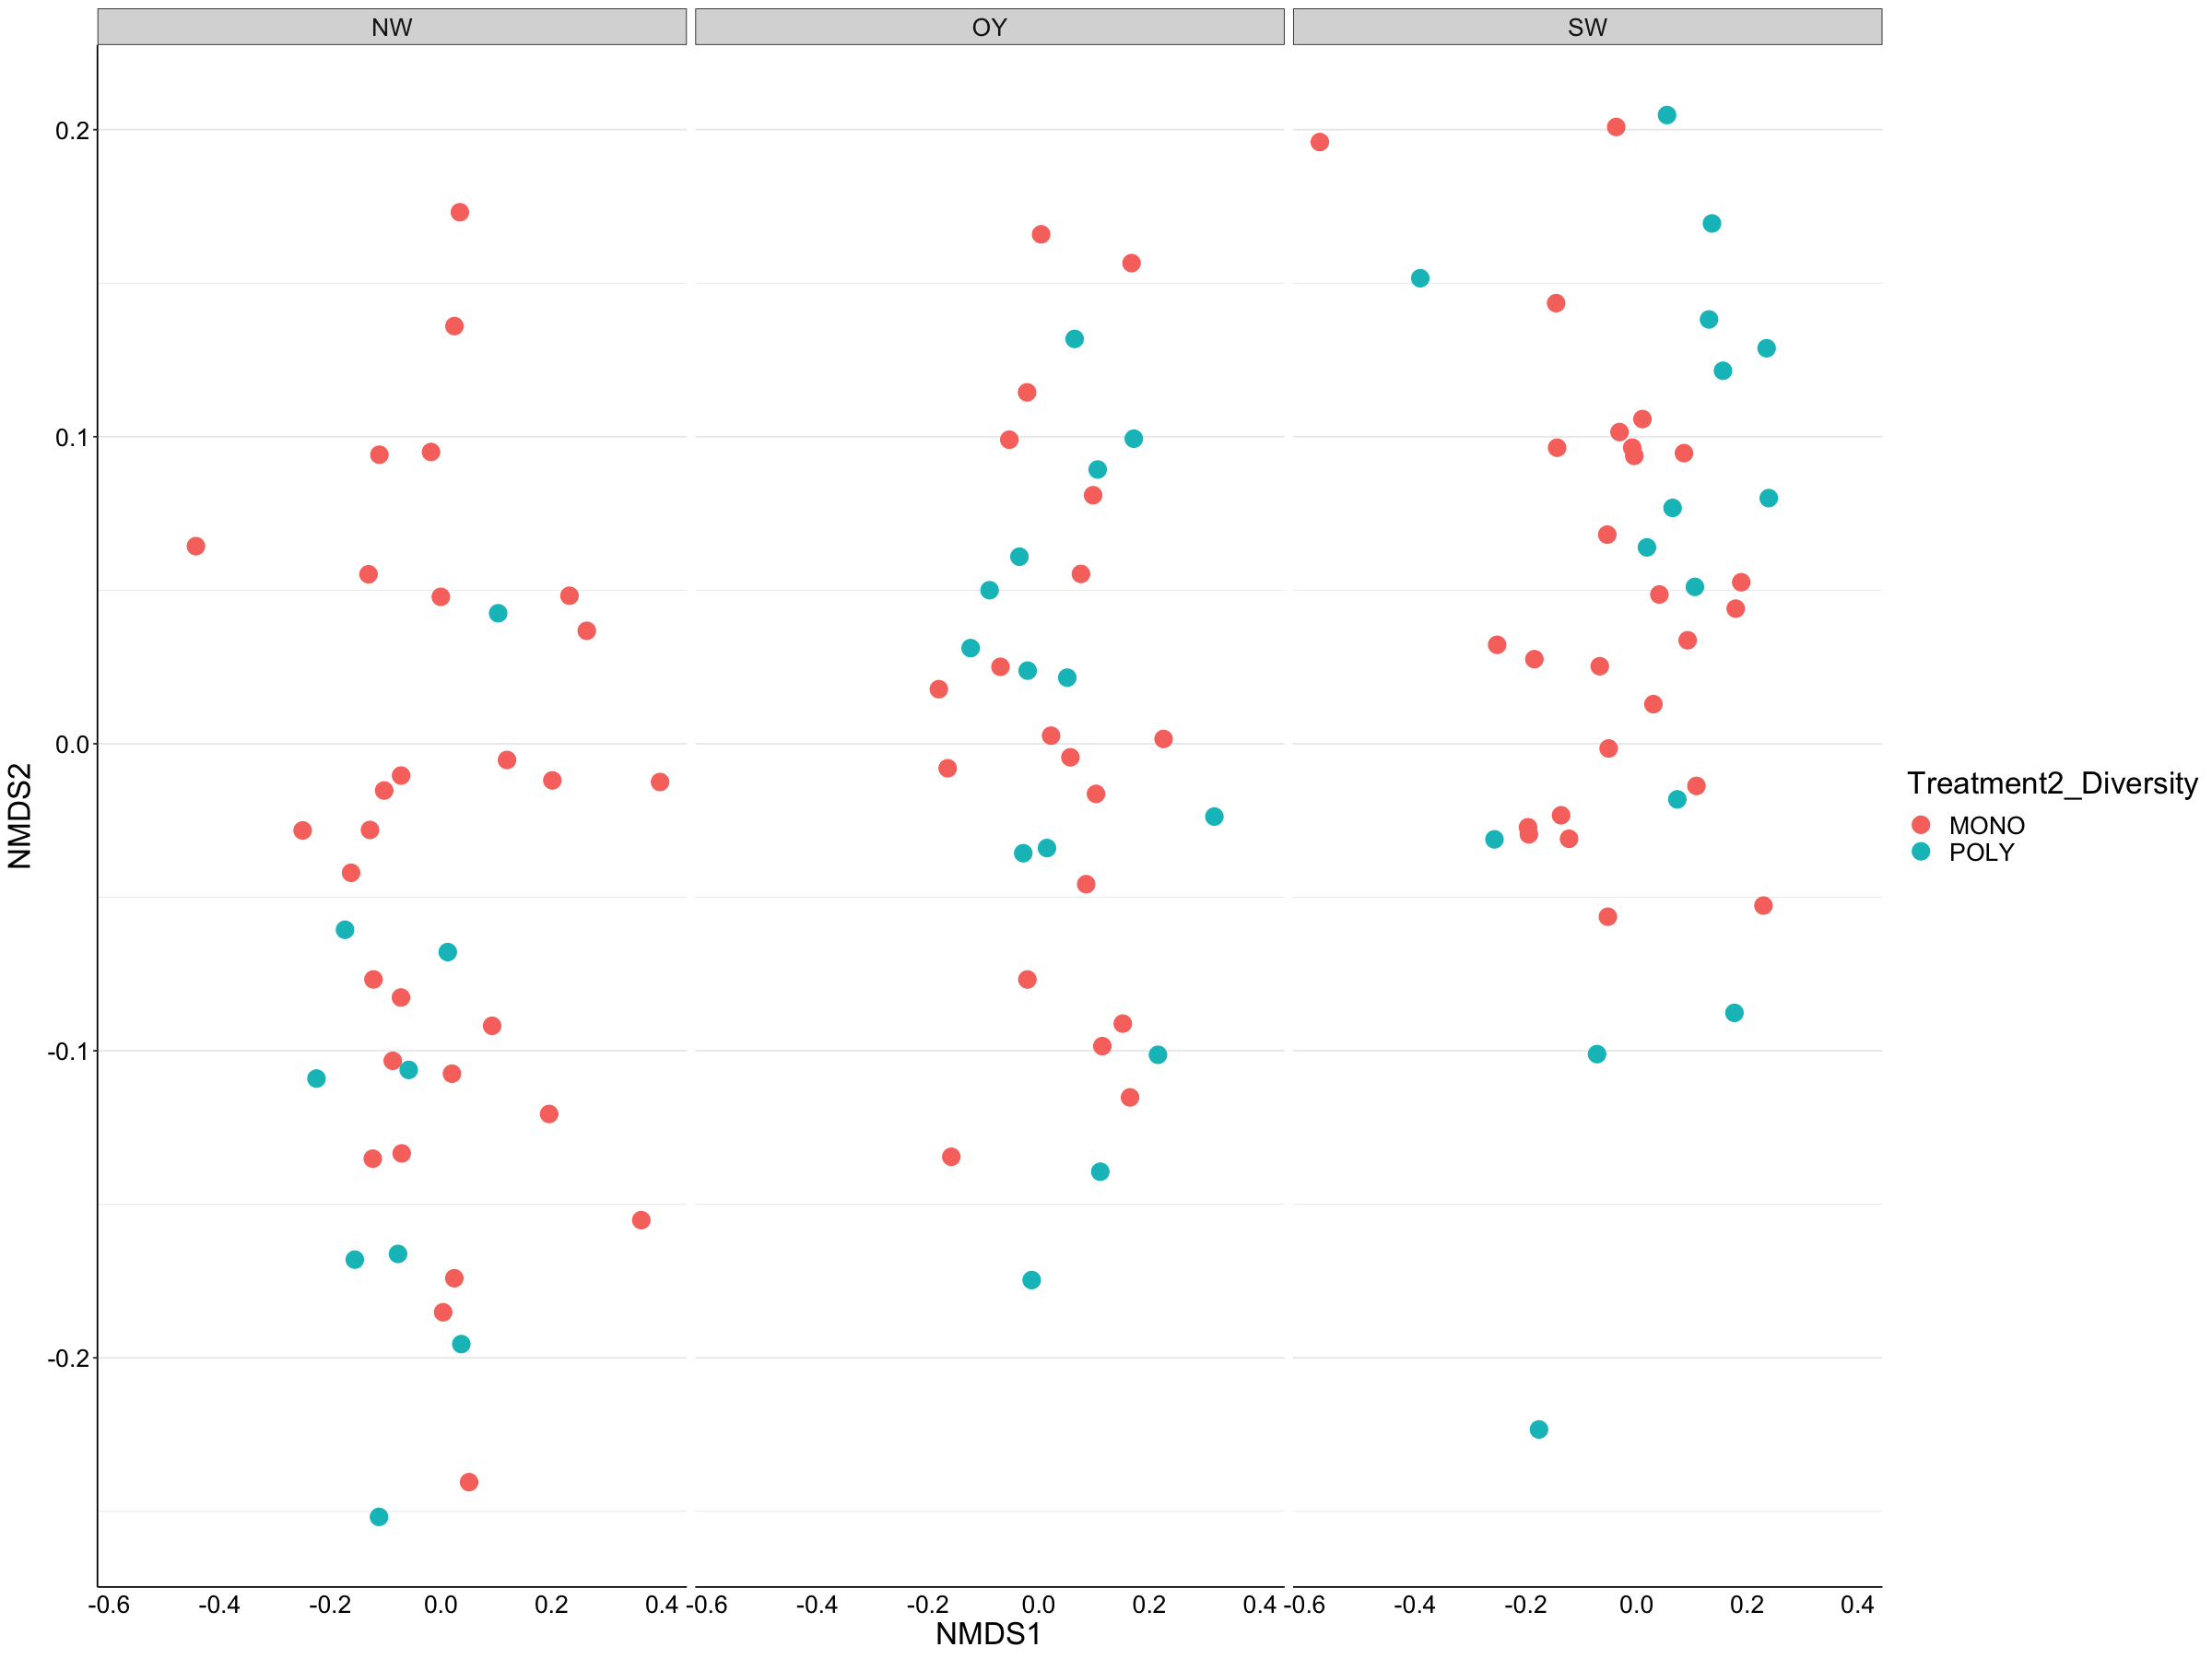

In [31]:
plot_ordination(DE17, DE17.ord, type="samples", shape="Treatment1.Density.", color="Treatment2_Diversity")+ 
facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

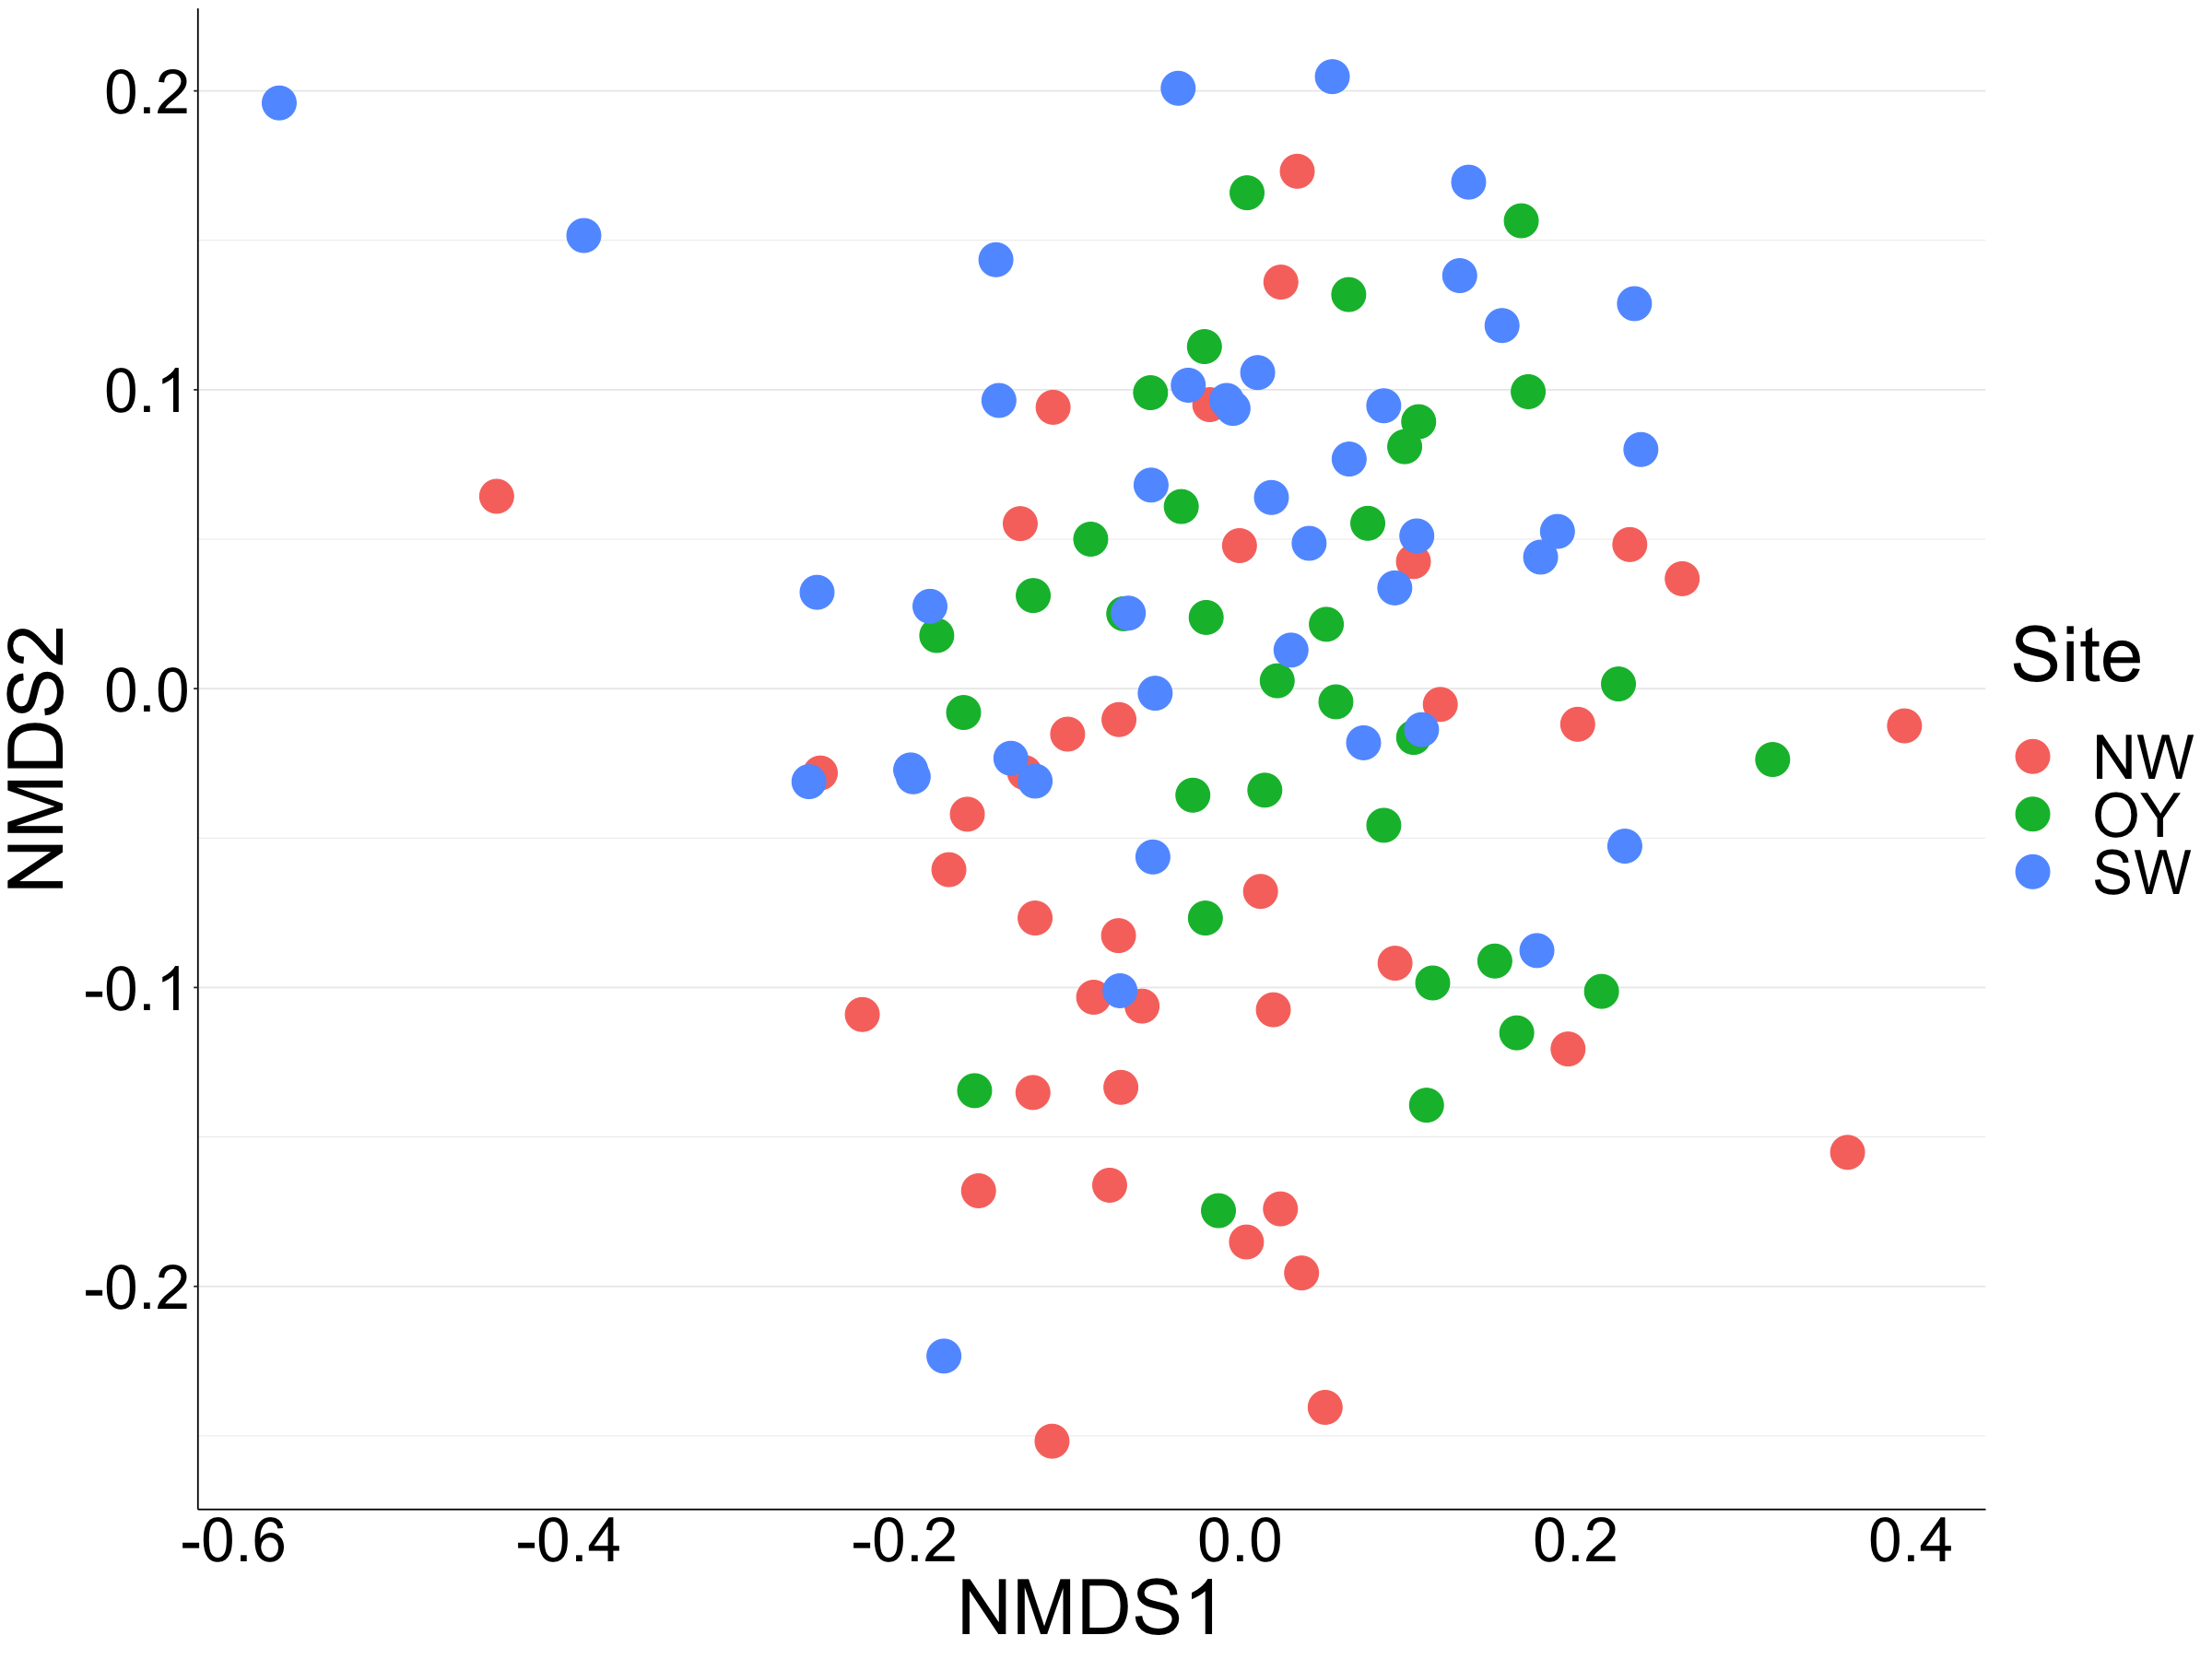

In [38]:
plot_ordination(DE17, DE17.ord, type="samples", , color="Site")+ 
#facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=10)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=50))

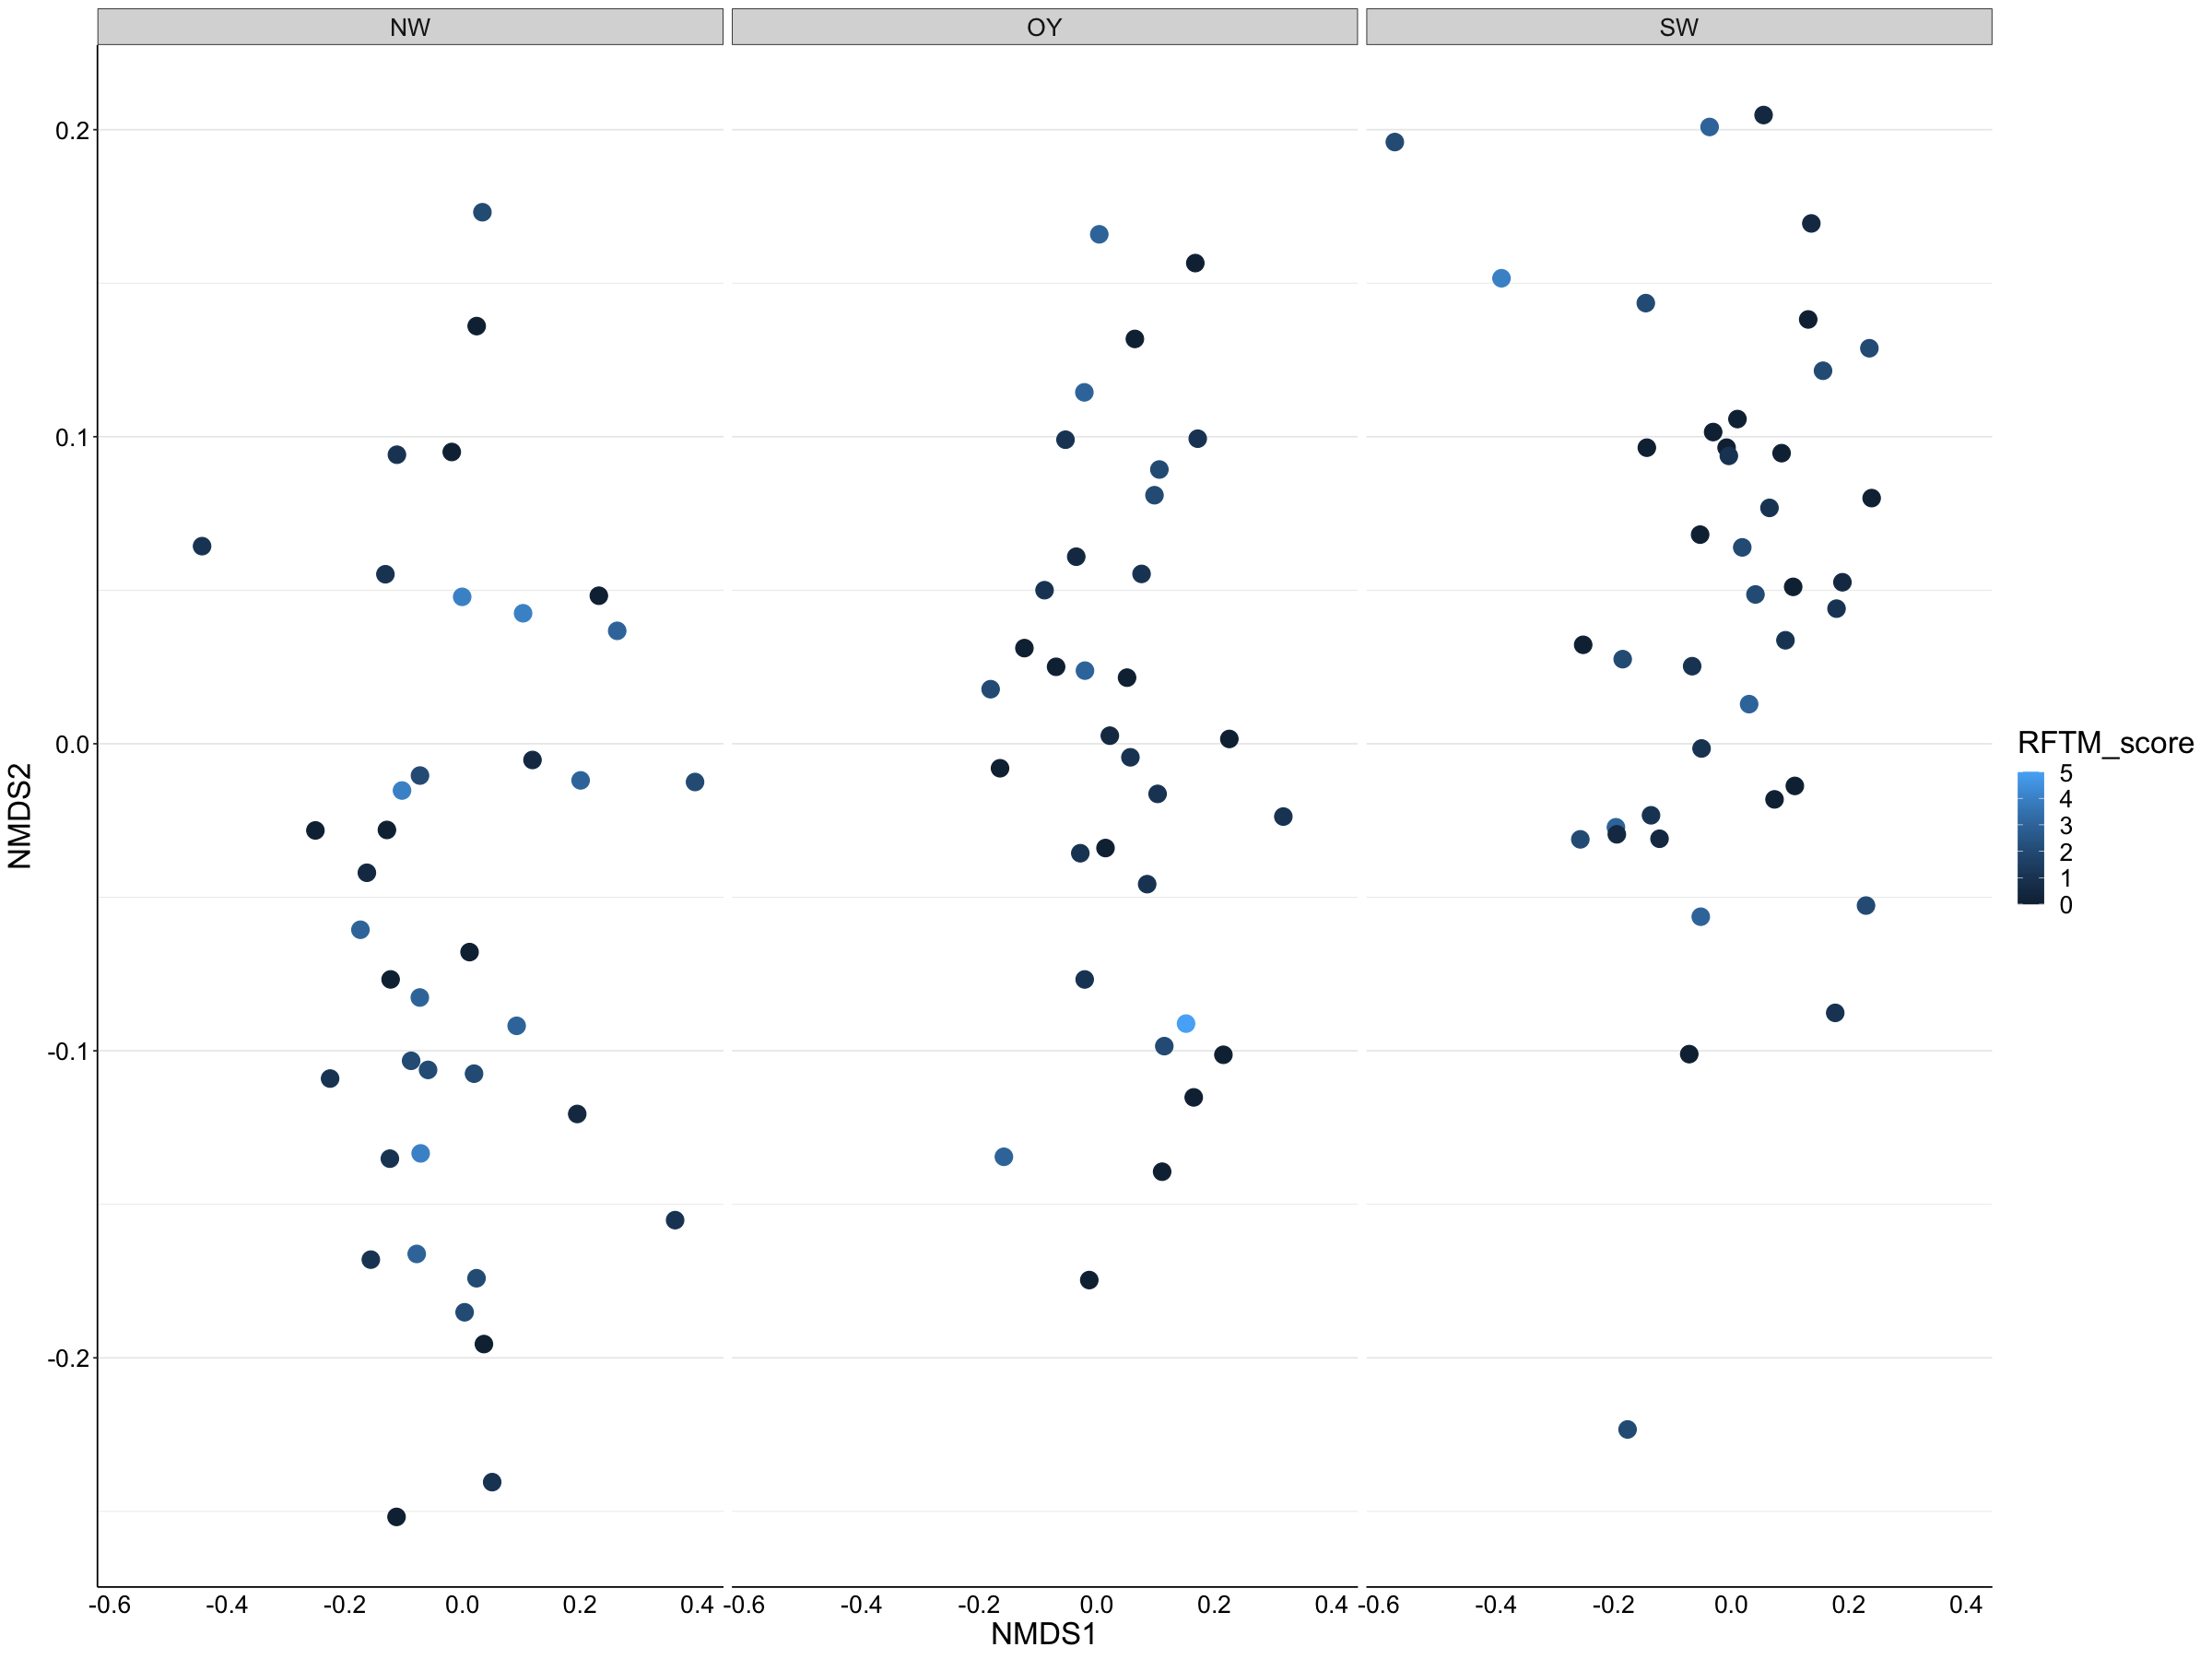

In [35]:
plot_ordination(DE17, DE17.ord, type="samples", color="RFTM_score")+ 
facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

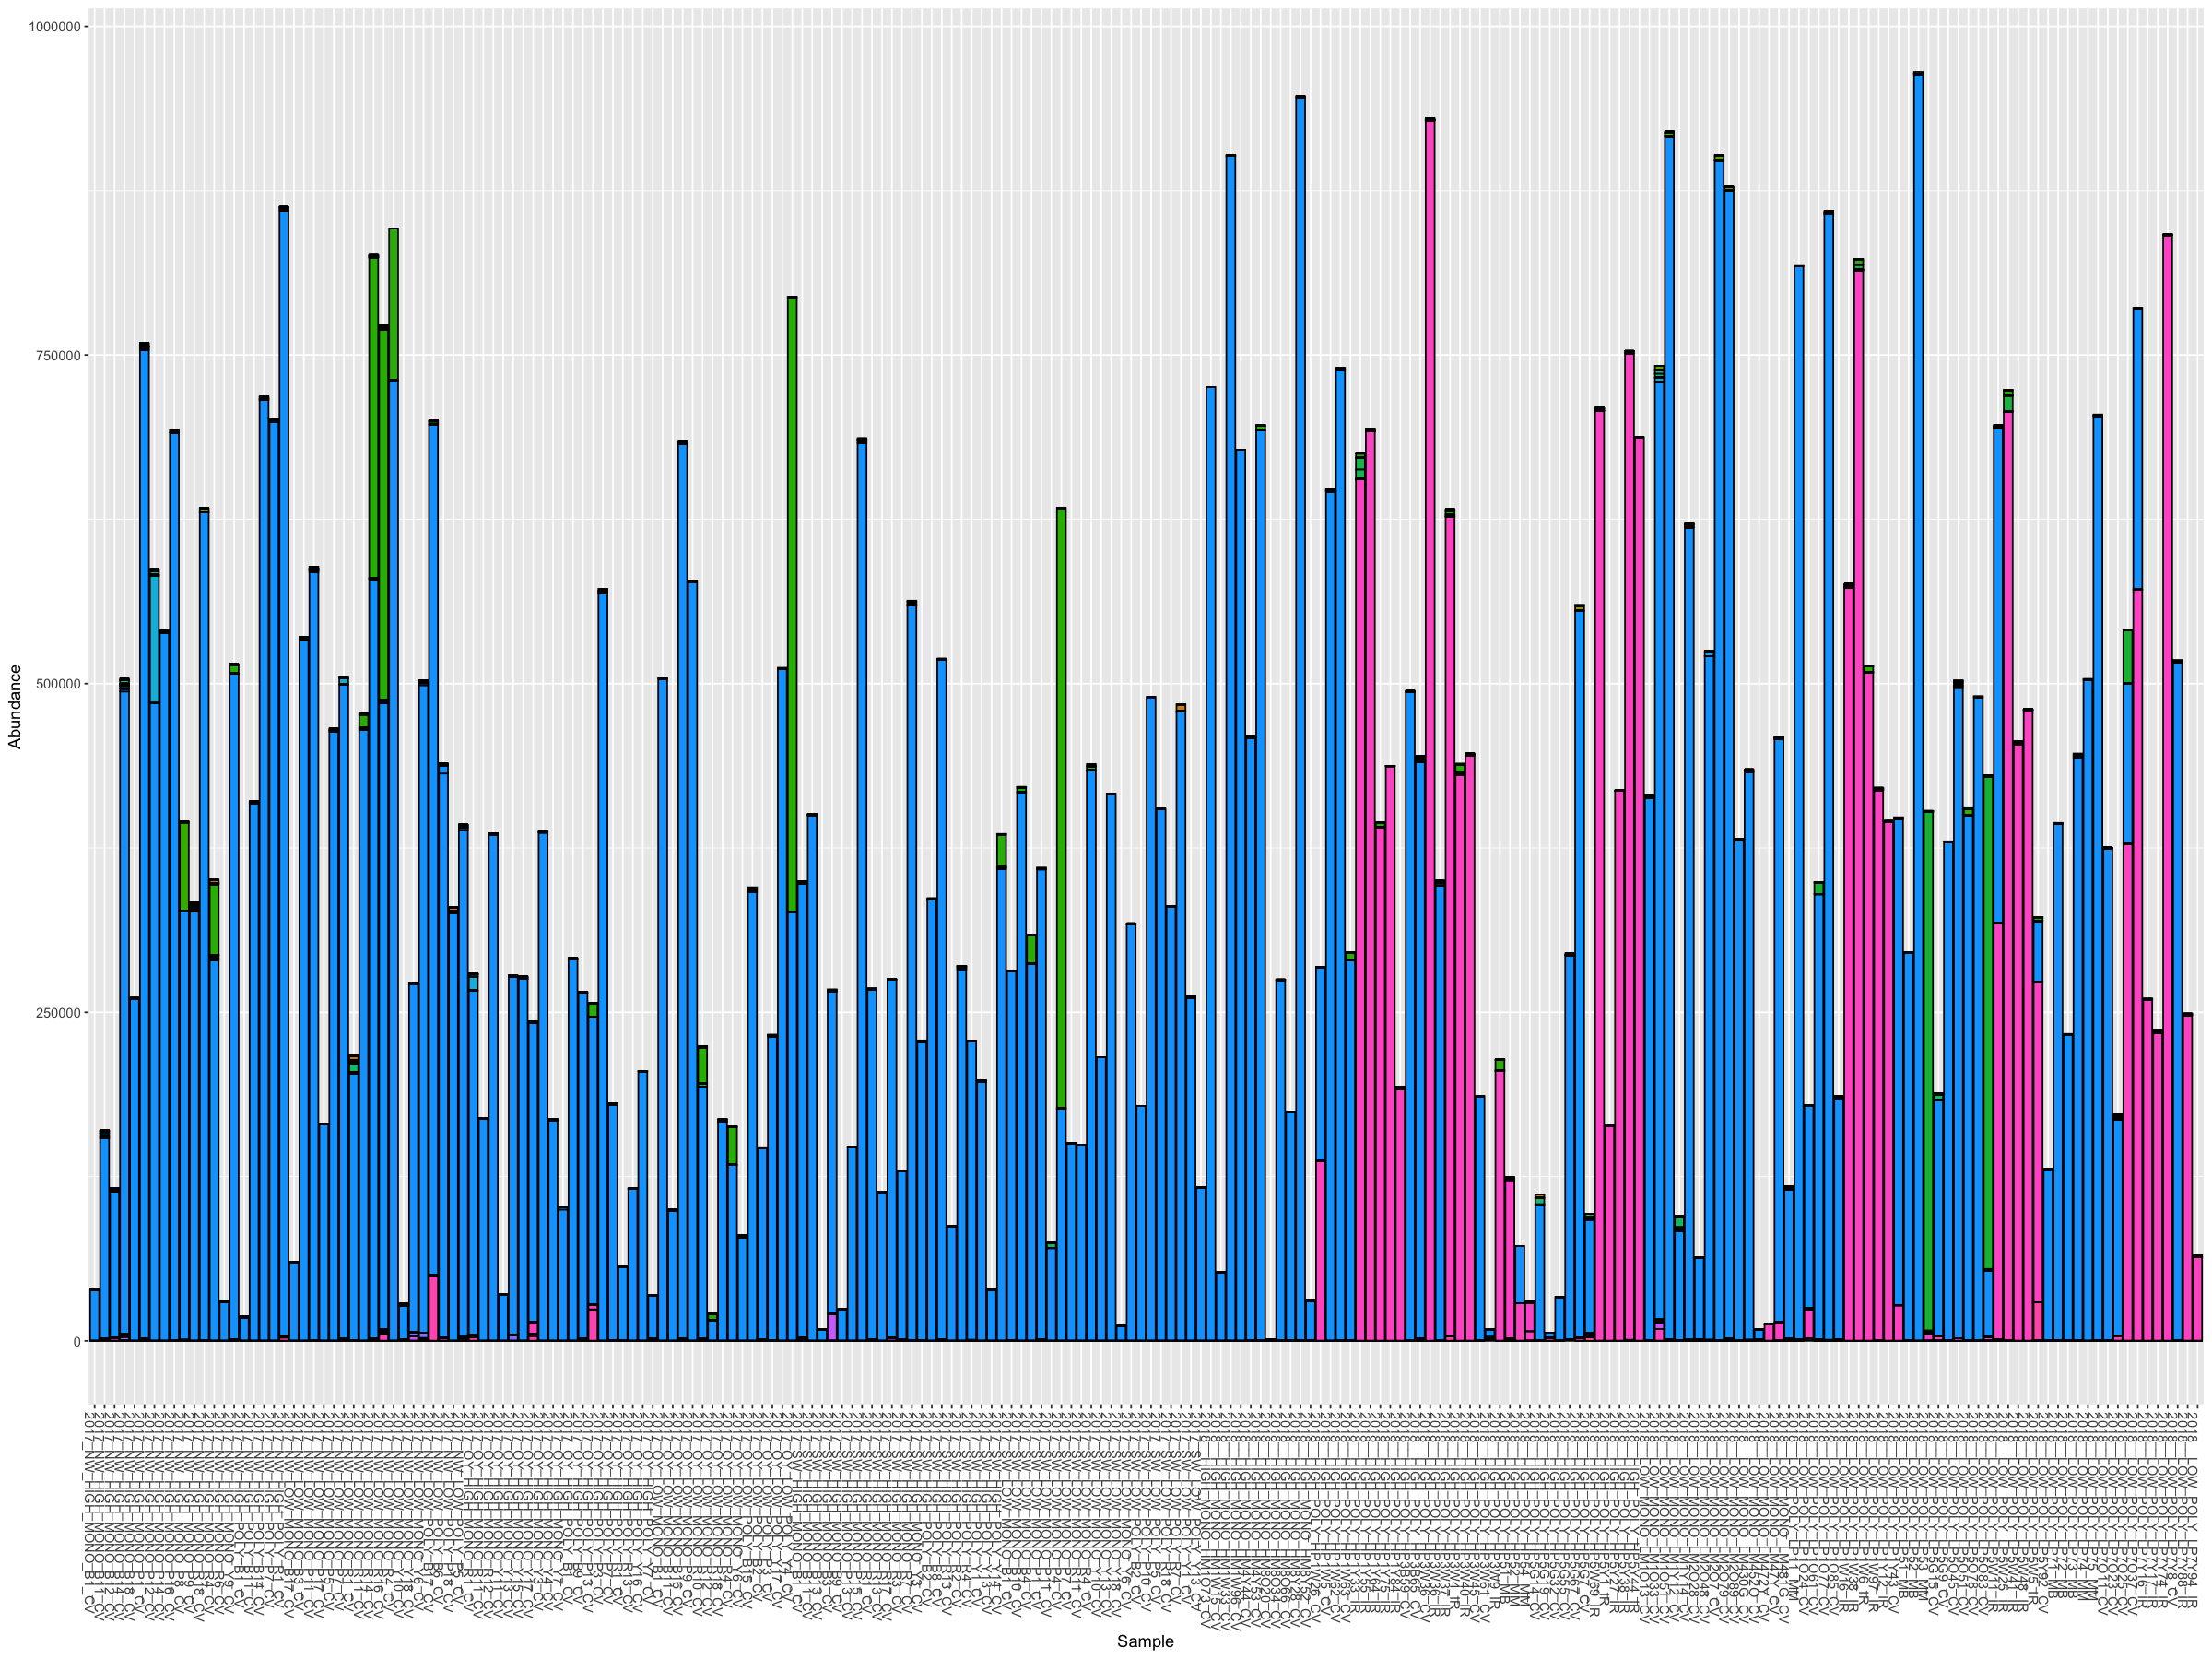

In [63]:
DE_Spiro = subset_taxa(DE, Phylum=="Spirochaetota")
plot_bar(DE_Spiro, fill="OTU")+
theme(legend.position = "none")

In [57]:
DE17_Spiro = subset_taxa(DE17, Phylum=="Spirochaetota")
DE17_Spirof = filter_taxa(DE17_Spiro, function(x) mean(x) > 100, TRUE)

In [69]:
mycolors= colorRampPalette(brewer.pal(6, "Dark2"))(10)

In [75]:
mycolors

[1] "#1B9E77" "#847B36" "#CD6015" "#966A77" "#8E60A9" "#CD3893" "#BC5266"
 [8] "#74982A" "#9EA811" "#E6AB02"

In [76]:
taxa_names(DE17_Spirof)

[1] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                 
[2] "TACGTAAGGAGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGTGCGTGCAGGCTGTTTATTAAGTCTGATGTGAAAGTGCACAGCTTAACTGTGTTGTTGCGTTGGAAACTGGTAAACTAGAATTCGAGAGAGGAAATTGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAAGAACACCTGAGGCGAAAGCGAATTTCTGGCTCTGAATTGACGCTGTAGCGCGAAAGCGTAGGGAGCAAACAGG"                   
[3] "TACGTAAGGAGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGTGCGTGCAGGCGGTTTGCCAAGTCTGATGTGAAAGCATACAGCTCAACTGTATTGTTGCGTTGGAAACTGGTGAACTAGAATTCGAGAGAGGAAATTGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAAGAACACCTGAGGCGAAAGCGAATTTCTGGCTCTGAATTGACGCTGAAGCGCGAAAGCGTAGGGAGCAAACAGG"                   
[4] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTTCTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                   
[5] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCAGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                 
[6] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTTCTCGACTAGAGTTTTATAGAGGTAGCAGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                   
[7] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGTTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                 
[8] "TACGTAAGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGTGTAGGCGGTCTTGAAAGTCTGGAGTTAAAGACCACAGCTTAACTGTGGGAGTGCTTCGGAAACTGCAAGACTAGAATCTAGCAGGGGTAATCGGAATTTCTAGTGTAGGGGTGAAATCTGTTGATATTAGAAAGAACACCAGAGGCGAAGGCGGATTACTGGGTTAAGATTGACGCTGAGGCGCGAAAGCGTAGGTAGCAAACAGG"                   
[9] "GTGTCAGCGCGCGGTAATACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"

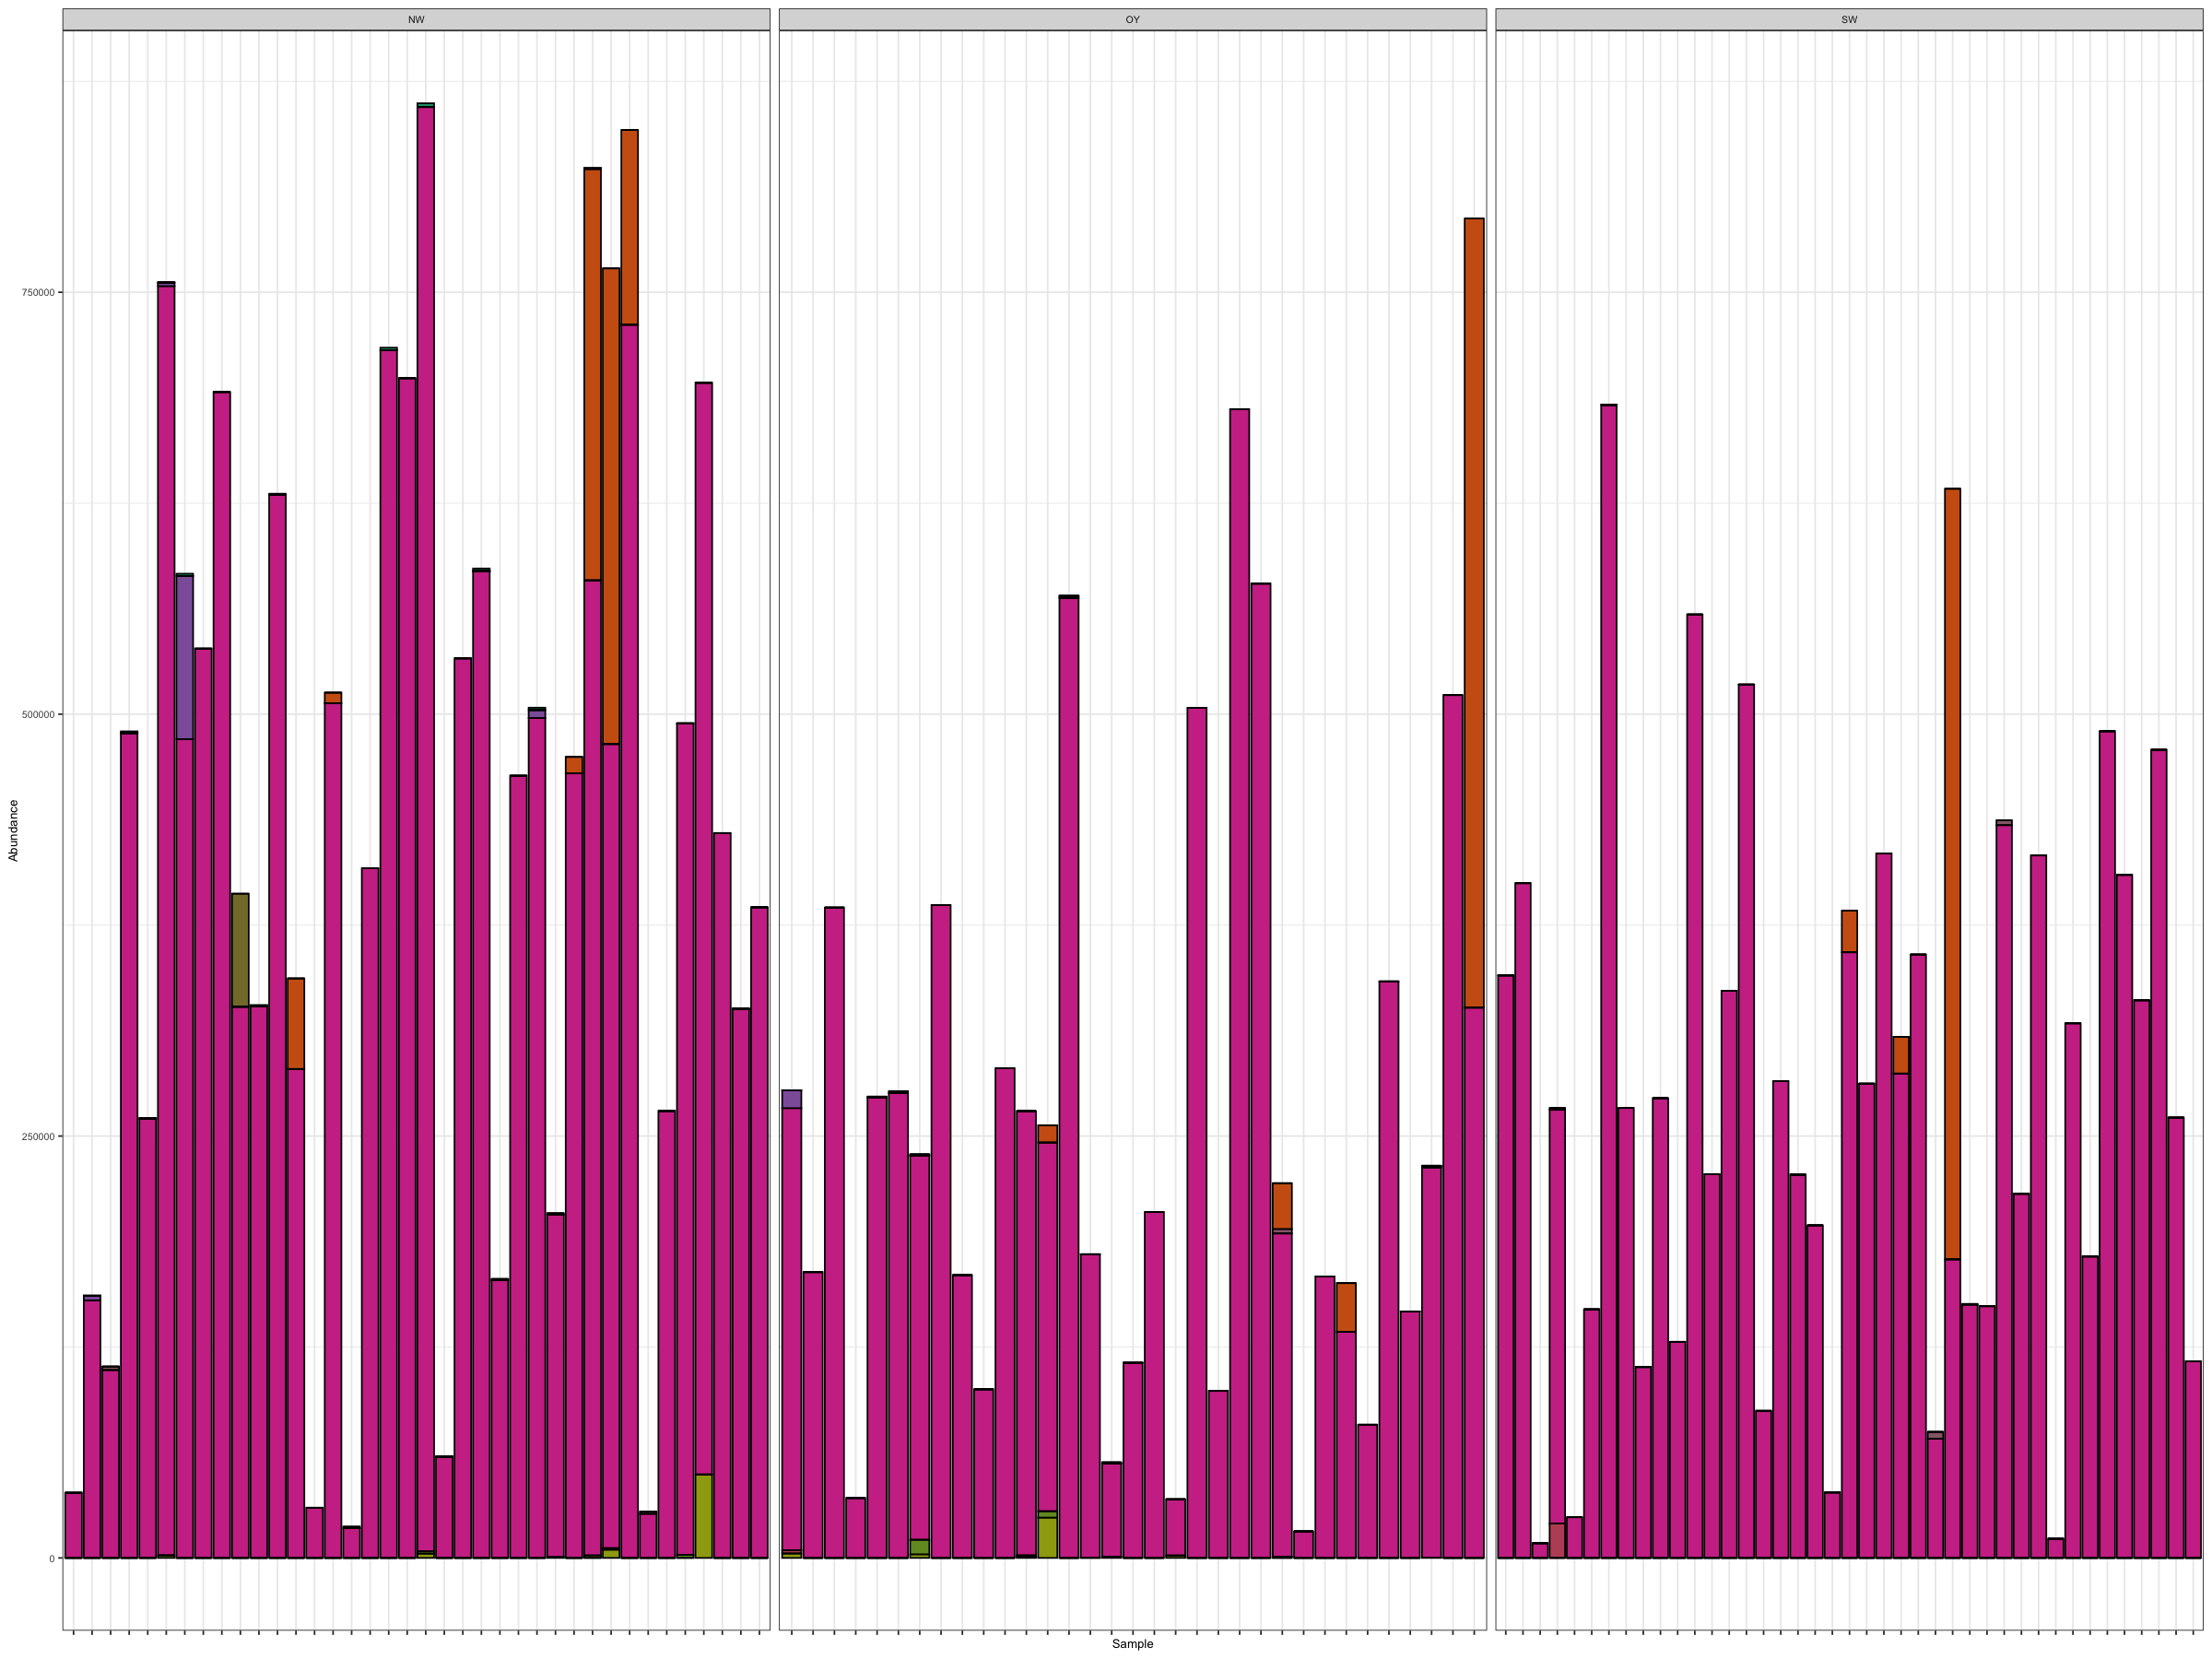

In [82]:
plot_bar(DE17_Spirof, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme_bw()+
theme(legend.position = "none", text = element_text(size=8), axis.text.x = element_blank())+
facet_grid(.~Site, scales="free_x")


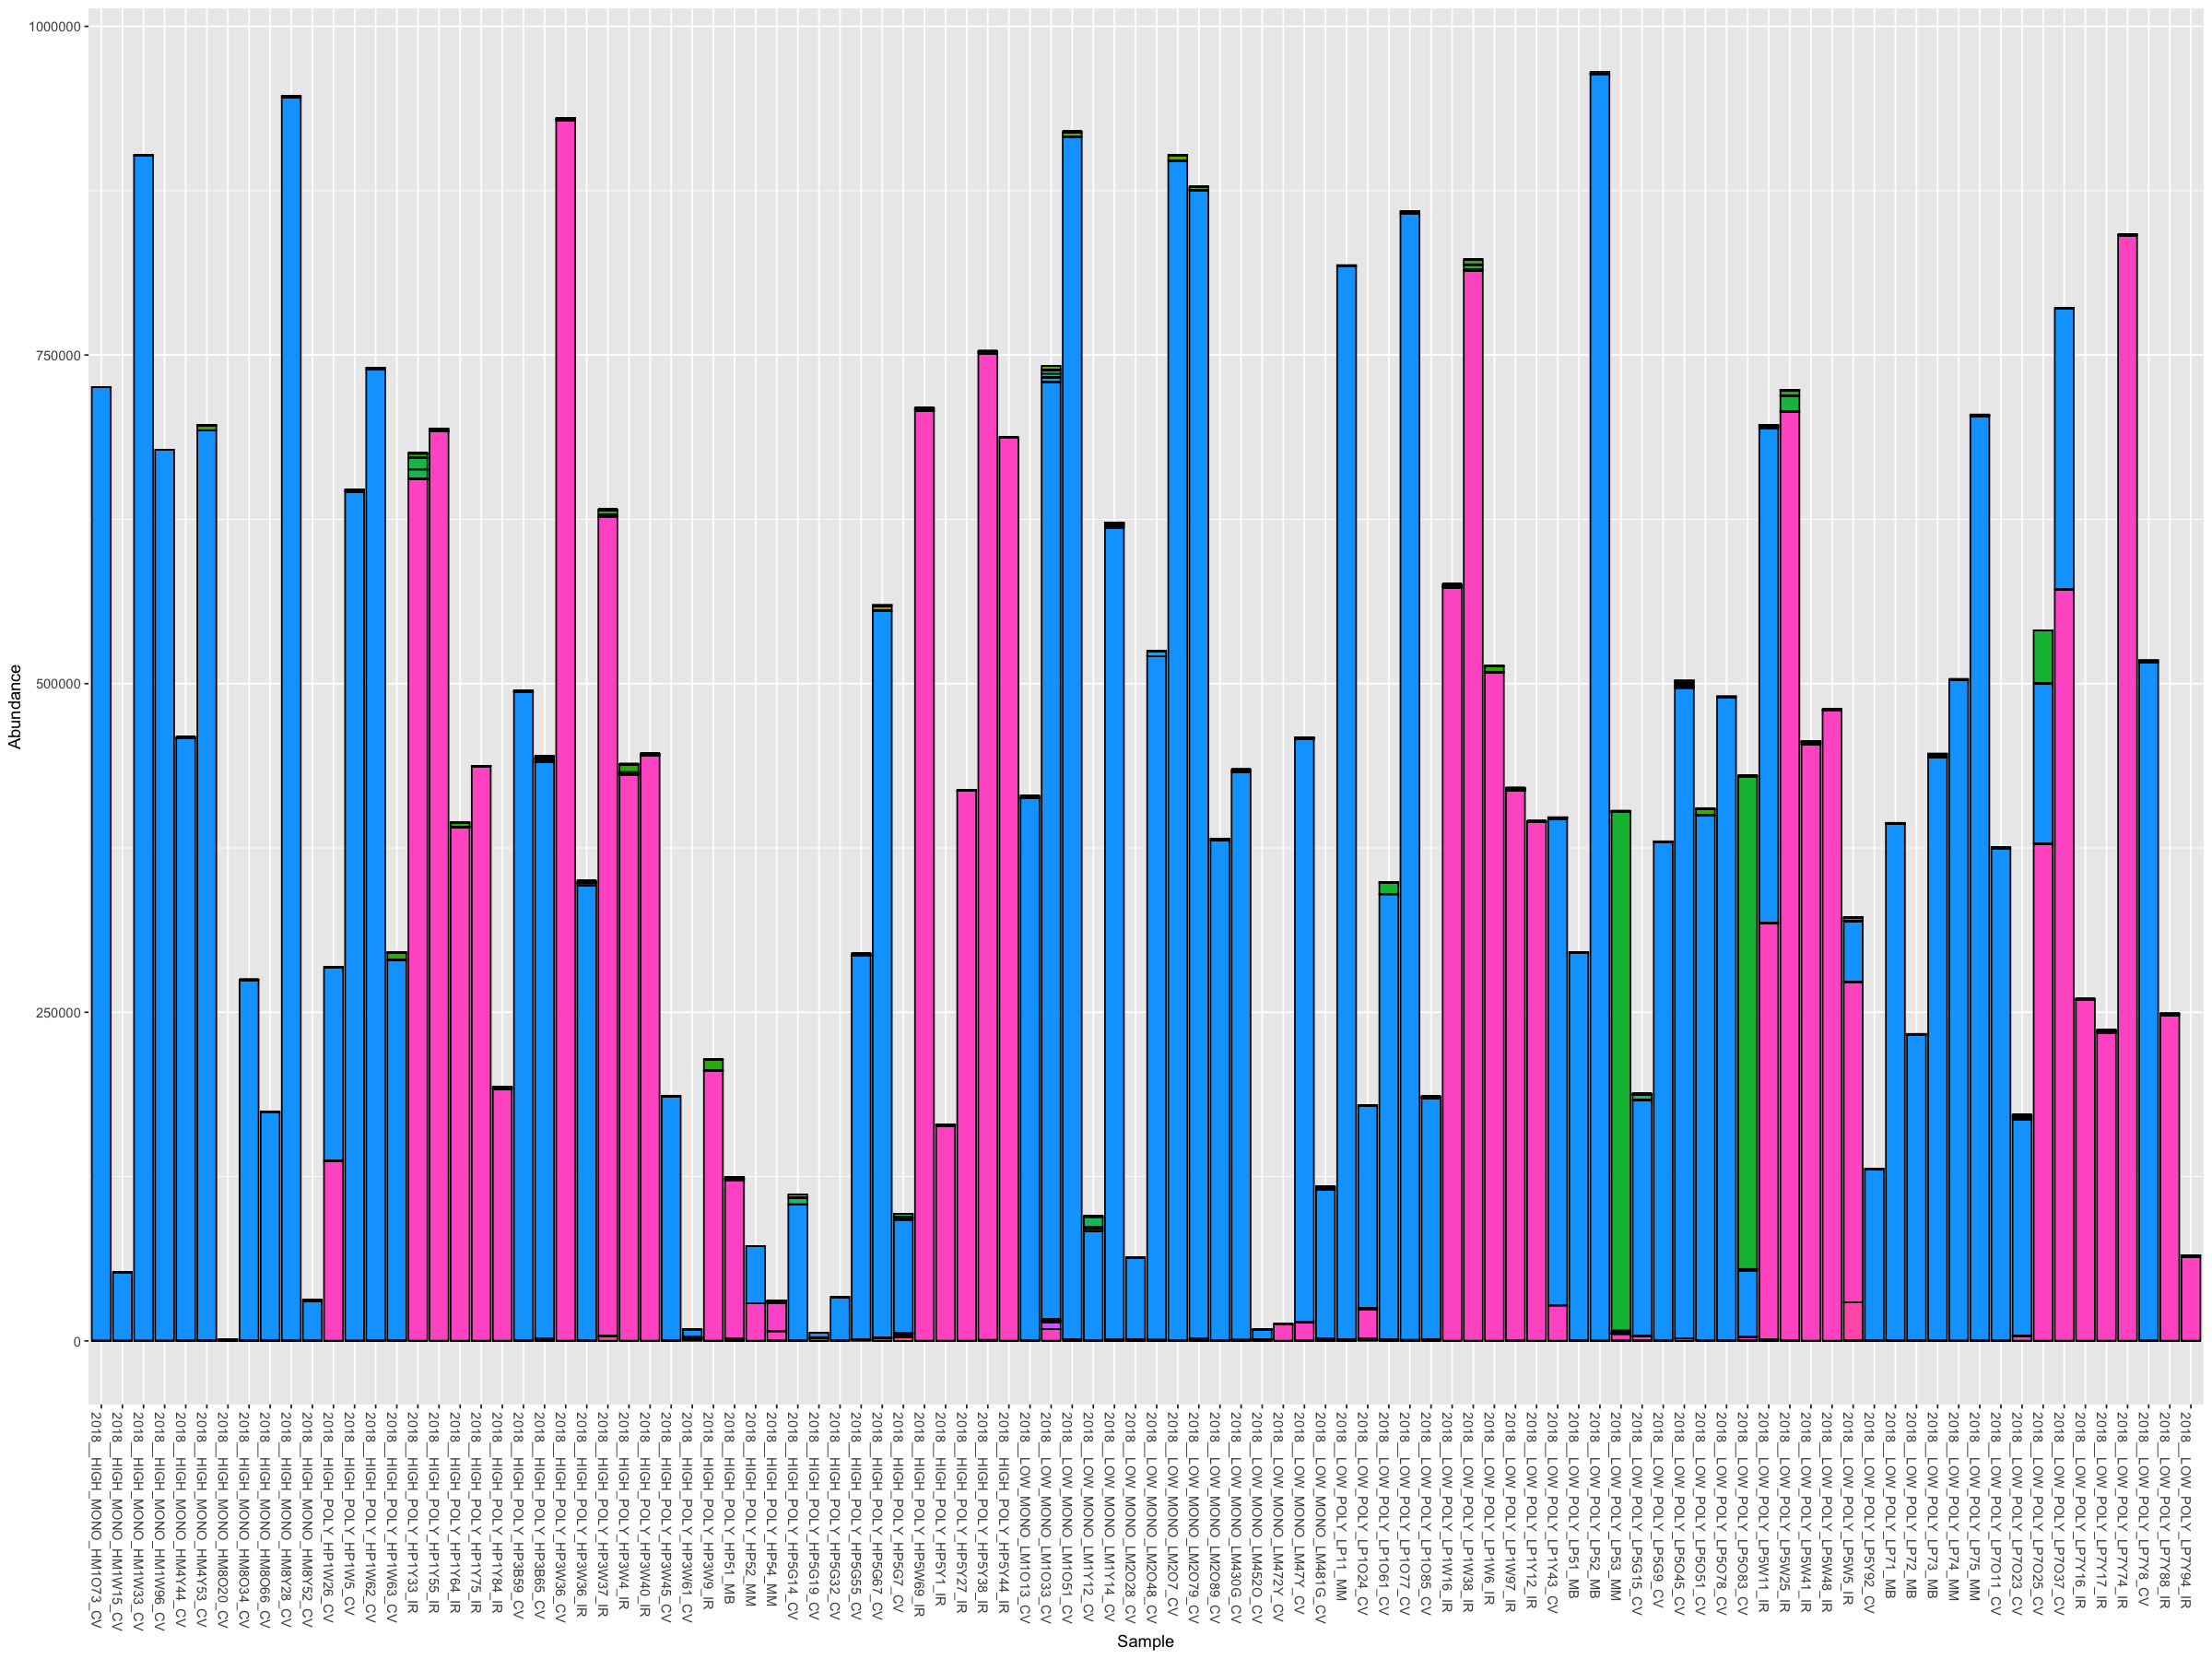

In [61]:
DE18_Spiro = subset_taxa(DE18, Phylum=="Spirochaetota")
plot_bar(DE18_Spiro, fill="OTU")+
theme(legend.position = "none")